# Data Science Project

# The Proposal

Our Aim is creating an application that can generate music given sets of music files labeled by their genres. The user will be able to control different kinds of properties in the generated song on demand according to parameters like instruments, genre and rhythm.

Why is that important?  
Having an application that can compose different kinds of music on demand may be very valuable for musicians and composers. The application may be a source of inspiration for them while simulating the how the end result is going to sound like. 

The algorithm we chose for our project is an LSTM (Long Short Term memory) neural network, which is a type of an RNN (Recurrent Neural Network). To understand why we chose this particular architecture, let’s first look at some properties of Music.

Music is comprised of patterns of sounds, and what makes “good” music is usually a collection of sounds or key notes that follow some structures called Scales.

“In music theory, a scale is any set of musical notes ordered by fundamental frequency or pitch”
- Wikipedia

Put simply, a scale is a collection of notes (sounds) that follow some predefined pattern. It consists of a root note, and all the other notes in the scale are derived from the root. The difference between two notes is called an ***Interval***.

To see things more clearly, let’s look at a very common type of scale called the “Major” scale.


![alt text](https://i.ibb.co/Gkf14pz/Capture.png)

There is a total of 7 notes in the major scale, and the intervals between two neighboring notes are written in blue and are as follows:

W stands for ***Whole Tone***
H stands for ***Half Tone***

On a guitar neck, intervals are represented as follows:

 ![alt text](https://i.ibb.co/XXwhSHq/Capture1-PNG.png")

Moving to the nearest fret is moving half a tone, while skipping one fret is moving a whole tone.
The 7 notes that make up the ***C Major*** scale are: C, D, E, F, G, A, B, (Which correspond to the all familiar notes respectively: ***do re mi fa sol la si***) with C (do) being the root, and all the other notes are derived from the root by the predefined intervals.

In comparison, the ***D Major*** scale consist of: D, E, F♯, G, A, B, C♯
●	The ***#*** sign means “Move half a tone higher”, so F♯ means the note F (fa) but a half tone higher.

So musical scales are defined by intervals alone and aren’t tied up to any specific note in particular… but why are scales that important?
Well, remember that friend of yours who plays the guitar but sometimes plays the wrong note and it ruins the whole “flow” of the song? That’s because this wrong note is ***off scale*** (usually), and it breaks the immersion that was built up in your head by the song up to that point.
In other words, if a melody stays in scale, it will be more pleasant to the ear.

So scales are very important in music composition, and there are countless scales which make up countless differents ***patterns*** of notes.

This brings us to the RNN in general, and to the LSTM in particular, which we will cover in more depth later on.

***Our data*** comes as MIDI files. MIDI stands for*** Musical Instrument Digital Interface***, and is basically a way for digital musical instruments to communicate with one another and transmit musical information.

MIDI holds information about the pitch, strength (also called velocity) and duration of a note, and by converting it to a CSV file via a special program, we get something that looks like this:


2, 0, MIDI_port, 0
2, 0, Title_t, "Bass Synt"
2, 3072, Note_on_c, 1, 26, 96
2, 3072, Note_on_c, 1, 38, 86
2, 3220, Note_on_c, 1, 38, 0
2, 3220, Note_on_c, 1, 26, 0
2, 3648, Note_on_c, 1, 26, 97
2, 3648, Note_on_c, 1, 38, 96
2, 3788, Note_on_c, 1, 38, 0
2, 3788, Note_on_c, 1, 26, 0

So what does all this exactly mean?

**2, 3072, Note_on_c, 1, 26, 96**

This line says that track 2 contains the following event: At 3072 ticks after the beginning of the song, begin playing note 26 on channel 1, with a velocity (strength) of 96 out of 127.
This note will stop playing later, when the following event is received, because it has the same channel and note, but has a velocity of 0:

**2, 3220, Note_on_c, 1, 26, 0**

It occurs 148 ticks later.

We will give hereby brief explanations to the concepts and their implementations in our final project.

***So what is a Recurrent Neural Network?***

Recurrent Neural Network (RNN) is a neural network in which nodes are connected to form a directed graph along a temporal sequence. It allows to exhibit temporal dynamic behavior. RNNs can use their internal state (memory) to process whole patterns in the input. That said, RNN networks are networks with loops in them, allowing information to persist. In the picture below, we can see in two perspectives how an inner-loop in a neural network can be thought of as multiple copies of the same network, each passing a massage to a successor.
 
![RNN vs DNN t](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png)

***What is a Long Short-Term Memory Network?***

Long Short-Term Memory (LSTM) is an RNN architecture can process both single data points (such as images) and entire sequences of data (such as audio or video). A common LSTM unit is composed of a cell, an input gate, an output gate, and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.
Let’s drill down a little more just to show the high-level differences between the architectures. The following picture represents a repeating module in a single-layered standard RNN, that been shown and explained previously:


 
On the contrary, the following picture represents the same in an LSTM that contains four interacting layers:
 
 ![alt text](https://i.ibb.co/j6d3NmR/Capture3.png)
 
In order to explain how LSTM works, we will stand on the differences and get to the point of why we chose using *LSTM*.
Why LSTM suits best for this mission? (theoretic explanation)
1.       Why RNNs over other neural network architectures?
A feedforward neural network would have no chance composing music as a generation of note-by-note. Such architecture, with no ability to store past information, would be unable to keep track of where it is in a song. RNNs does not suffer from this limitation.
2.       Why LSTM over classical Recurrent neural networks
Classical RNNs do not excel at finding long-term dependencies in data, which makes them relatively insensitive to make the global structure that defines a musical form.
LSTM can find long-term dependencies in data which, the difference is in the solving the “vanishing gradient problem” in short – that the gradients can tend to zero. LSTM solves the problem by enforcing constant error flow. In doing so, it can find long-term dependencies in Data.
***The vanishing gradient problem*** is a difficulty when training a neural network – or, more specifically this is a problem that involves the weights in the earlier layers of the network. Recall that during training, stochastic gradient descent or SGD works to calculate the gradient of the loss with respect to the weights in the network. The Vanishing gradient problem occurs when in those earlier layers the gradients become very small. So small that any update on their values, by nature, as it is proportionate to the value it holds –maintains almost unaffected. Which makes it tough for the network to train the gradient to its optimal value. It has implication for the remainder of the network and impairs the ability of the network to learn.

***Which researches show it’s going to work?***

LSTM networks are widely known for their ability to compose music. As shown in the following articles:
1.  “Recurrent neural networks (RNN), especially long short-term memory networks (LSTM), have been shown to be extremely effective at modeling single-dimensional temporal patterns.” Generating Polyphonic Music Using Tied Parallel Networks, Daniel D. Johnson
2.  Learning The Long-Term Structure of the Blues, Douglas Eck and Jurgen Schmidhuber




# Data Preparation Stage

Our goal is to compose a song with 4 instruments: **Guitar**, **Piano**, **Bass** and **Drums**, so we need to train our model on examples that contain these 4 instruments.

A MIDI (__Musical Instrument Digital Interface__) file consists of **Midi Events** which are commands that dictate the song structure.

Let's load a demo midi song and see what we find.

In [1]:
from IPython.display import IFrame
IFrame('https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/642045108&color=%23ff5500&auto_play=false&hide_related=false&show_comments=true&show_user=true&show_reposts=false&show_teaser=true', width="100%", height="166", scrolling="no", frameborder="no", allow="autoplay")

To load it into readable format, we'll choose the py-midicsv library to parse it as a CSV

In [2]:
from music21 import converter, midi
import midi, py_midicsv, glob

for i, song in enumerate(glob.glob("midi_example.mid")):
    print("\nSong Name: {}\n\n".format(song.split('\\')[-1:][0]))
    csv = py_midicsv.midi_to_csv(song)
    [print(str(num) + ":  " + str(x.replace('\n', ''))) for num, x in enumerate(csv)]


Song Name: midi_example.mid


0:  0, 0, Header, 1, 6, 480
1:  1, 0, Start_track
2:  1, 0, Title_t, "Midi Example"
3:  1, 0, Tempo, 500000
4:  1, 0, End_track
5:  2, 0, Start_track
6:  2, 0, Title_t, "Jazz Guitar"
7:  2, 0, Program_c, 0, 27
8:  2, 0, Time_signature, 4, 2, 24, 8
9:  2, 0, Note_on_c, 0, 67, 72
10:  2, 0, Key_signature, 0, "minor"
11:  2, 0, Control_c, 0, 101, 0
12:  2, 0, Control_c, 0, 100, 0
13:  2, 0, Control_c, 0, 6, 6
14:  2, 240, Note_off_c, 0, 67, 64
15:  2, 240, Note_on_c, 0, 65, 72
16:  2, 480, Note_off_c, 0, 65, 64
17:  2, 480, Note_on_c, 0, 62, 72
18:  2, 720, Note_off_c, 0, 62, 64
19:  2, 720, Note_on_c, 0, 60, 72
20:  2, 960, Note_off_c, 0, 60, 64
21:  2, 960, Note_on_c, 0, 58, 72
22:  2, 1200, Note_off_c, 0, 58, 64
23:  2, 1200, Note_on_c, 0, 53, 72
24:  2, 1440, Note_off_c, 0, 53, 64
25:  2, 1440, Note_on_c, 0, 50, 72
26:  2, 1680, Note_off_c, 0, 50, 64
27:  2, 1680, Note_on_c, 0, 55, 72
28:  2, 1920, Note_off_c, 0, 55, 64
29:  2, 1920, End_track
30:  3, 0,

Each midi song needs to have a "Header" event (line 0), and a "End of file" event (line 158).
Each track in the midi song has to have a Start, Program, Control and End events.

Lines 5 to 29 are "Track 2" midi events, because they all start with the number 2.

line 5:  **2, 0, Start_track** is a "Start track" midi event that initialized this track.<br>
line 6:  **2, 0, Title_t, "Jazz Guitar"** Is a "Title" midi event, that sets a title to the track, so now we can understand that Track 2 is the track for "Jazz guitar".<br>
line 15:  **2, 240, Note_on_c, 0, 65, 72** is a "Note on" event, and translates to: on track 2, at 240 ticks since the begining of the song, use program number 0 to play pitch 65 with volume 72.<br>
line 29: **2, 1920, End_track** is an "End track" midi event and translated to: Ater 1920 tick, this track is over.

Track 2 is a guitar track, and the program number of a guitar is 0.

There are 8 tracks in the midi song: 6 instruments, one song initializer(track 1) and 1 file initializer (track 0)

|Track No|Track Title|
|--------|-----------|
|0|Initializer|
|1|Midi Example|
|2|Jazz Guitar|
|3|Electric Bass|
|4|Drum kit|
|5|Viola|
|6|Acoustic Grand Piano|

The tracks that we're interested in are: 

|Track No|Track Title|
|--------|-----------|
|2|Jazz Guitar|
|3|Electric Bass|
|4|Drum kit|
|6|Acoustic Grand Piano|

Everything else is just noise. Notice that even though track number 5 is a "Viola" track it is ignored because we need our data set to be consistent.<br>
We need to isolate these tracks, and we will do so by reading the title of each track, since most Midi songs have readable track titles

**Problem**:<br>
Our goal is to compose a 4 instrument song by letting a neural network learn from musical sequences. That means that for each time stamp we need to feed the network the notes that are played at the same time.

Trouble is that in a midi file the data is like a list, but the list isn't necesarily sorted by any order, so all notes that are played together in a certain tick are scattered across the list, making it very hard to track them down immediately. <br>

For example, Here we have snippets from track 2, 3 and 6, with colored events happening at the same time.

<font color=red>Notes that are played at tick **240**</font><br>
<font color=green>Notes that are played at tick **480**</font><br>
<font color=blue>Notes that are played at tick **720**</font><br>

From Track 2:<br>
12:  2, 0, Control_c, 0, 100, 0<br>
13:  2, 0, Control_c, 0, 6, 6<br>
14:  2, 240, Note_off_c, 0, 67, 64<br>
<font color=red>**15:  2, 240, Note_on_c, 0, 65, 72**</font><br>
16:  2, 480, Note_off_c, 0, 65, 64<br>
<font color=green>**17:  2, 480, Note_on_c, 0, 62, 72**</font><br>
18:  2, 720, Note_off_c, 0, 62, 64<br>
<font color=blue>**19:  2, 720, Note_on_c, 0, 60, 72**</font><br>
20:  2, 960, Note_off_c, 0, 60, 64<br>
<br>

From Track 3:<br>
35:  3, 0, Control_c, 4, 101, 0<br>
36:  3, 0, Control_c, 4, 100, 0<br>
37:  3, 0, Control_c, 4, 6, 6<br>
38:  3, 240, Note_off_c, 4, 31, 64</font><br>
<font color=red>**39:  3, 240, Note_on_c, 4, 34, 72**</font><br>
40:  3, 480, Note_off_c, 4, 34, 64<br>
<font color=green>**41:  3, 480, Note_on_c, 4, 38, 72**</font><br>
42:  3, 720, Note_off_c, 4, 38, 64<br>
<font color=blue>**43:  3, 720, Note_on_c, 4, 34, 72**</font><br>

From Track 6:<br>
138:  6, 480, Note_off_c, 2, 50, 64<br>
<font color=green>**139:  6, 480, Note_on_c, 2, 50, 72<br>
140:  6, 480, Note_on_c, 2, 62, 72<br>
141:  6, 480, Note_on_c, 2, 64, 72**<br></font>
142:  6, 960, Note_off_c, 2, 50, 64<br>


**Solution**:<br>
While scanning the list, we determine desired tracks and store their data in an easy-to-use data structure. We can write a state-machine like program to parse this list.

## Initialize the state machine

Scan each line from the CSV file, and keep track of the instruments we find.<br>
First we need a counter to keep track of how many valid instruments we find, and save their track numbers.

In [3]:
    # How many valid instruments have we encountered.
    counter = 0
    
    # Track numbers that makes up our "band".
    # Initialized to -1 and should be changed to anything higher.
    #      [  Guitar, Piano, Bass, Drums]
    band = [   -1,   -1,   -1,    -1  ]
    
    # Instrument track number, also initialized to -1
    inst_num = -1
    
    # Data sctucture to hold the information of our relevant tracks.
    song_dataset = dict()

## The loop
* For each line in the CSV file we will take the midi event, clean it up from unwanted characters such as white spaces and '\n', and split it by the ' , ' character
* Since track initializations always come before note assignments, we can rely on the fact that we will first encounter a track title before it's notes, so we can initialize the track in our song_dataset
* Title events look like this: [3, 0, Title_t, "Electric Bass"], so we need to look for keywords in the event[3] cell

In [4]:
    for num, line in enumerate(csv):
        
        # Scan, clean and split midi event
        event = [y for y in line.replace("\n", "").replace(" ", "").split(',')]
        
        # Print out first line to show to show midi event break down to details
        if num == 0: print("\nLines are parsed like this: " + str(event) + "\n")
        
        # Since track initializations always come before note assignments, we can rely on the fact
        # that we will first encounter a track title before it's notes.
        
        # Track name declerations
        # Check in title has any of the relevant instruments.
        
        # Once we found a match, we set the "inst_num" variable to a hardcoded id for consistency accross
        # all parsed midis in the dataset.
        # We also increase "counter" to keep track of how many relevant instruments we found so far
        
        if len(event) > 3:

            if "Guitar" in event[3] and "Bass" not in event[3] and "bass" not in event[3]:
                print("Guitar track found!")
                inst_num = 0
                counter += 1

            if "Piano" in event[3]:
                print("Piano track found!")
                inst_num = 1
                counter += 1

            if "Bass" in event[3]:
                print("Bass track found!")
                inst_num = 2
                counter += 1

            if "Drum" in event[3]:
                print("Drums track found!")
                inst_num = 3
                counter += 1
            
            # if inst_num > -1, it means that a new instrument was found, and so we save it's track
            # number in the "band" list, in place that is specified by the hard coded id of "inst_num"
            # Then we reset this parameter for next use.
            
            if inst_num > -1:
                band[inst_num] = int(event[0])
                inst_num = -1


        # Note on event
        # Once we arrive at a "Note on" event, we first need to check that the track it's assigned to is
        # one that we need.
        # event[0] is the track number, so we can check the condition "int(event[0]) in band"
        
        if event[2] == 'Note_on_c' and int(event[0]) in band:
            
            # event[5] is the volume of the note in a "Note on" event. In other words, it's the strength
            # with which the note is played. We only want the notes who's volume is higher then 0
            if int(event[5]) > 0:
                
                # select the track title to pose as a header in the song_dataset
                int_name = ["Guitar", "Piano", "Bass", "Drums"][band.index(int(event[0]))]
                tick_num = int(event[1])

                # Check if tick exists in parsed track
                if tick_num not in song_dataset.keys():
                    song_dataset[tick_num] = dict()

                if int_name not in song_dataset[tick_num].keys():
                    song_dataset[tick_num][int_name] = list()
                
                # event[4] is the pitch of the note in a "Note on" event
                song_dataset[tick_num][int_name].append(int(event[4]))


Lines are parsed like this: ['0', '0', 'Header', '1', '6', '480']

Guitar track found!
Bass track found!
Drums track found!
Piano track found!





After parsing the whole song, we want to check the dataset's quality. For that let's look at the notational structure of the song.
Our desired 4 tracks look like this:<br><br><br><br>


<font color=green size=5>**Guitar:**
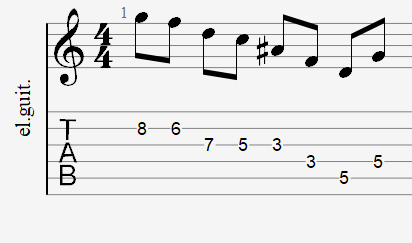
    
**Piano:**
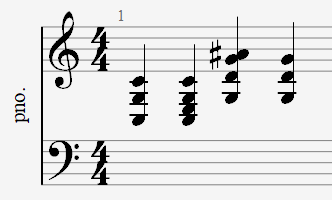

**Bass:**
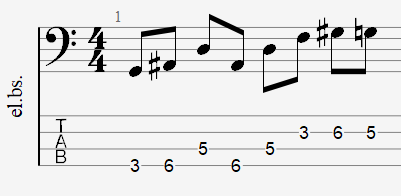

**Drums:**</font>
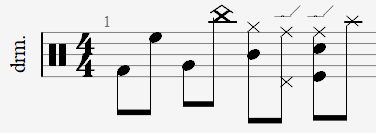

<br><br><br><br>
For the **Guitar** and **Bass** tracks, there is a total of 8 timestamps in each track, and for each time stamp there is 1 note. **Drums** also have 8 timestamps, but for each time stamp there are between 1 and 2 notes, and for the **Piano** track, we actually have 4 time stamps, with multiple notes (Chord).<br>

So how does all this work out in the end? Well, without getting into musical theory too much, the main thing to know is that this kind of notation

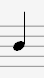

is called a **one eighth**, and this notation
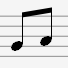

is called a **two eights**.

The duration of a two eighths is twice as short as the one eighth, so that means that each chord in the piano track spans onto two timestamps in the other tracks.<br>
Now let's print out the song dataset and see what we have there, in the following format:

Tick _time__stamp_:<br>
    Guitar:  _[List of notes played for Guitar in this time stamp]_<br>
    Piano: _[List of notes played for Piano in this time stamp]_<br>
    Bass:  _[List of notes played for Bass in this time stamp]_<br>
    Drums:  _[List of notes played for Drums in this time stamp]_<br>

In [5]:
for time_stamp in song_dataset.keys():
    print('Tick ' + f"{time_stamp}:")
    for inst in song_dataset[time_stamp].keys():
        print(f"{inst}: {[note for note in song_dataset[time_stamp][inst]]}")
    print()
    

Tick 0:
Guitar: [67]
Bass: [31]
Drums: [36]
Piano: [67, 62, 50]

Tick 240:
Guitar: [65]
Bass: [34]
Drums: [50]

Tick 480:
Guitar: [62]
Bass: [38]
Drums: [43]
Piano: [50, 62, 64]

Tick 720:
Guitar: [60]
Bass: [34]
Drums: [52]

Tick 960:
Guitar: [58]
Bass: [38]
Drums: [42, 47]
Piano: [67, 73, 59]

Tick 1200:
Guitar: [53]
Bass: [41]
Drums: [44, 51]

Tick 1440:
Guitar: [50]
Bass: [44]
Drums: [35, 38, 51]
Piano: [57, 60, 64]

Tick 1680:
Guitar: [55]
Bass: [43]
Drums: [55]





We can see that half the ticks have a piano part, while the other half doesn't. This is because each note in the piano role is twice as long as all the others.

Also, all the piano parts are chords, and consist of several notes.

Looks like our midi was successfully parsed! We are now ready to save the song_dataset to a file , and to create a filtered midi song that only has the 4 desired tracks.<br>

In [6]:
# We first validate that counter > 3, meaning that there are 4  out of 4 instruments
# in the current song, and we also make sure that all places in "band" have an assigned track number

print(f"There are {counter} instruments present in the song")
print(f"The track numbers are {band}")

There are 4 instruments present in the song
The track numbers are [2, 6, 3, 4]


Reminder, this is the track title list

|Track No|Track Title|
|--------|-----------|
|0|Initializer|
|1|Midi Example|
|2|Jazz Guitar|
|3|Electric Bass|
|4|Drum kit|
|5|Viola|
|6|Acoustic Grand Piano|


We can clearly see that tracks 2, 6, 3, and 4 were successfully detected and assigned.

We will now save the MIDI files and the parsed dataset as a txt files in a folder called "midi_songs".

In [7]:
    if counter > 3 and all(w > -1 for w in band):
        pattern = midi.read_midifile(song)

        new_patter = midi.Pattern()
        new_patter.format = pattern.format
        new_patter.resolution = pattern.resolution
        new_patter.tick_relative = pattern.tick_relative

        for j in band:
            new_patter.append(pattern[j-1])
        nm = song.split('\\')[-1:][0]
        if len(song_dataset.keys()) > 0:
            with open("../midi_songs/" + nm + ".txt", 'w') as f:
                f.write(str(song_dataset).replace('\'', "\""))

            midi.write_midifile("../midi_songs/" + nm, new_patter)
            print(nm + " was successfully saved!")

midi_example.mid was successfully saved!


# Training

The 'Training' step is the second step of our project in terms of dealing with data science. Our goals in this step are data loading and preperations, as well as training the model which in turn would create a weights file that will serve us in the next step.

In [8]:
import glob, sys, pickle, numpy, itertools

from music21 import converter, instrument, note, chord
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, CSVLogger

import ast

Using TensorFlow backend.


In each training iteration (which we will refer to as a "run") a new folder is being created. Every such folder will contain:<br>
* The run's log file
* An nn_model.py file
* A copy of the generate.py file
* A 'range' file.

(We will address each of these files later when they are created)

Now we will create a new folder for the current run. It's name will be the current UnixTime to avoid collisions.


In [9]:
import time, os
time_stamp = str(time.time()).split('.')[0]
os.mkdir(time_stamp)

print(time_stamp)

1561862429


## Get notes

Get all the notes and chords from the midi files in the ./midi_songs directory<br>
The function is going through all the midi files in the given folder, reads them and classifies them by their instrument. 

Here we also create the "range" file for this current run, as mentioned before, which will contain all the ranges of all notes and chords for each instruments

In [10]:
def get_notes():
    notes = []
    for i, file in enumerate(glob.glob("../midi_songs/*.txt")):
        
        # We restrict the dataset to only 10 items so the training time isn't very
        # long for this example.
        
        if i > 10: break
            
        with open(file, 'r') as f:
            md = ast.literal_eval(f.read())

        for t in md.keys():
            parsed_tick = []
            tick = md[t]

            for inst in ["Guitar", "Piano", "Bass", "Drums"]:
                try:
                    filtered_list = [x for x in tick[inst]]
                    
                    # We want to restrict chords to max 3 notes in each instrument
                    # except the drums, to try and keep the dictionary range small
                    if inst is not "Drums": filtered_list = filtered_list[:3]
                    parsed_tick.append(str(sorted(set(filtered_list))).replace('[', '').replace(']', ''))
                except:
                    parsed_tick.append("")

            if all(len(x) > 0 for x in parsed_tick): notes.append(parsed_tick)
    
    with open(time_stamp + '/range', 'wb') as filepath:
        pickle.dump(notes, filepath)
    return (notes)

In [11]:
notes = get_notes()
# First 10 "notes"
print (*notes[:10], sep='\n')

['43', '48', '36', '35, 37, 70']
['50', '50', '38', '35, 37, 42, 70']
['64', '50', '38', '35, 37, 70']
['43', '43', '43', '35, 37, 70']
['43', '43', '43', '35, 37, 42, 70']
['55, 60', '45', '33', '35, 37, 70']
['50', '50, 60, 62', '38', '35, 37, 70']
['50, 57, 60', '50', '38', '35, 42, 70']
['50', '50', '38', '35, 37, 70']
['45', '50, 60, 74', '38', '35, 37, 70']


## Get n_range

This function returns the range of pitches each instrument has.<br>
It goes through each row in the notes array and appends the length of its set (group with no repetitions) into the returned array.

In [12]:
def get_n_range(notes):
    _range = []
    for i in range(4):
        _range.append(len(set([n[i] for n in notes])))
    return _range

In [13]:
#run get_n_range
n_range = get_n_range(notes)

In [14]:
instruments= ["Guitar", "Piano", "Bass", "Drums"]
for i in range(4):
   print ("instrument type:", instruments[i], "has range of" ,n_range[i], "unique notes / chords")

instrument type: Guitar has range of 80 unique notes / chords
instrument type: Piano has range of 109 unique notes / chords
instrument type: Bass has range of 39 unique notes / chords
instrument type: Drums has range of 48 unique notes / chords


## Prepare sequences

Prepare the sequences to be used by the Neural Network for training.

We are creating input sequences and their corresponding output sequences.

We reshape the input using numpy to match Keras's LSTM cell inputs: the inputs are transformed into a sequences of vector4 format. For example, after parsing our full dataset, the input vector is turned into a 3-dim numpy list: **(12884, 96, 4)**<br>
That means that there are **12884** examples in the dataset, each one of length **96** and size **4**

The output vectors are turned into a **one_hot** format. For example if we have 5 possible values in our range, and we want to represent the value '3', we will do is as so: **[0, 0, 1, 0, 0]**<br>
Since we have 4 instruments to consider in the output, we will have to consider 4 one_hot sequences. To match Keras' limitations, we had to fuse the 4 one_hots in one big vector.<br>
The length of the output vector is the size of all 4 one_hot vectors combined.

For example, if the guitar has a range of 5, piano has 3, bass has 2 and drums have 5, the combined output vector would be of size 15.

All the range sized are stored in the **n_range** parameter.

The network makes its prediction of the next note, based on the previous 96 (sequence_length) notes of each instrument.
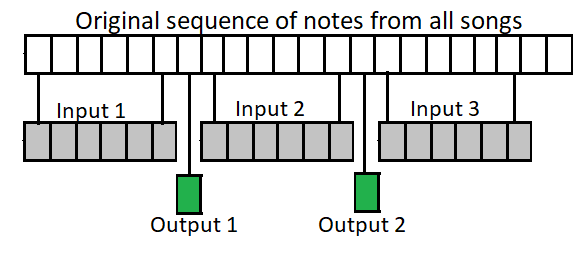

In [15]:
def prepare_sequences(notes, n_range):
    sequence_length = 96

    # get all pitch names
    pitch_names = [sorted(list(set([n[i] for n in notes]))) for i in range(4)]

    # create a dictionary to map pitches to integers
    note_to_int_map = [dict((note, number) for number, note in enumerate(pitch_names[i])) for i in range(4)]
    
    n_input = []
    n_output = []
    
    # create input sequences and the corresponding outputs
    for i in range(len(notes) - sequence_length):
        seq_input = notes[i:i + sequence_length]
        seq_output = notes[i + sequence_length]
        
        # Normalize the network input for better training process.
        
        n_input.append([[note_to_int_map[j][char[j]]/n_range[j] for j in range(4)] for char in seq_input])
        n_output.append([note_to_int_map[i][seq_output[i]] for i in range(4)]) 

    n_patterns = len(n_input)

    # reshape the input into a format compatible with LSTM layers
    n_input = numpy.reshape(n_input, (n_patterns, sequence_length, 4))
    
    # arrange network output into one hot form
    n_output = [np_utils.to_categorical([x[i] for x in n_output]).tolist() for i in range(4)]
    
    # the code section transforms the output to concatinate the columns of the matrix and turn them into rows in the new matrix.
    # it serves us to set a fixed form of output of the network at the length of the n_range of the pitch.
    # example will be given in the next cell
    concatinate = n_output
    concatinate = [[concatinate[j][i] for j in range(len(concatinate))] for i in range(len(concatinate[0]))]
    for i, x in enumerate(concatinate): concatinate[i] = [a for b in x for a in b]
    
    n_output = numpy.array(concatinate).reshape(n_patterns, sum(n_range))
    return (n_input, n_output)

Let's examine how the code works with a simple example.

In [16]:

print("Before:")
concatinate = [
      [[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]],
      [[4, 5], [4, 5], [4, 5], [4, 5], [4, 5]],
      [[6, 7, 8, 9, 10], [6, 7, 8, 9, 10], [6, 7, 8, 9, 10], [6, 7, 8, 9, 10], [6, 7, 8, 9, 10]],
      [[11], [11], [11], [11], [11]]
     ]
print(*concatinate, sep="\n")
print("\nAfter:")
concatinate = [[concatinate[j][i] for j in range(len(concatinate))] for i in range(len(concatinate[0]))]

for i, x in enumerate(concatinate): concatinate[i] = [a for b in x for a in b]

# We can see that it concatinates the columns of the matrix and turn them into rows in the new matrix.
print(*concatinate, sep="\n")

Before:
[[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]
[[4, 5], [4, 5], [4, 5], [4, 5], [4, 5]]
[[6, 7, 8, 9, 10], [6, 7, 8, 9, 10], [6, 7, 8, 9, 10], [6, 7, 8, 9, 10], [6, 7, 8, 9, 10]]
[[11], [11], [11], [11], [11]]

After:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [17]:
#run prepare_sequences and store sequences for later use.

n_input, n_output = prepare_sequences(notes, n_range)

## Create Network

The design of the model architecture. we can see below a dense layer in the size of the sum of the n_range array, used to represent every possible note in the range of every instrument.
We are calculating the loss by the categorical_crossentropy and using the RMSprop optimizer.

The model architecture will be explained in detail later in this notebook.

In [18]:
def create_network(n_input, n_range):
    print(n_input.shape)
    model = Sequential()
    model.add(LSTM(
        256,
        input_shape=(n_input.shape[1], n_input.shape[2]),
        return_sequences=True
    ))
    
    model.add(Dropout(0.2))
    model.add(LSTM(32))
    model.add(Dropout(0.2))
    model.add(Dense(sum(n_range)))
    model.add(Activation('softmax'))
    
    model.compile(metrics=["accuracy"],loss='categorical_crossentropy', optimizer='rmsprop')
    
    return model


**categorical_crossentropy**: Since or output is a one_hot type, it's values are either 0 or 1. In that sense each cell in the one_hot can be looked at as a "category"

**rmsprop**: A variant of "Stochastic gradient descent"

In [19]:
#run create_network
model = create_network(n_input, n_range)

(425, 96, 4)


Since we're running a minimized version of the dataset, we only have 425 examples to work with.

## Save Model

As mentioned before, each run folder should contain several important files. Here we generate 2 more of them

The **nn_model.py** file contains the network dependencies (imports) and a copy of the original model code.<br>
The **generate.py** file (the second step of the music generation process, will be further explained later) imports the "create_network" function from the nn_model file.

In [20]:
from shutil import copyfile

with open("../train.py", 'r') as f:
    model_str = ''
    ready = 0
    
    # We scan the train.py file and copy the model code
    # to the current run folder, as a "nn_model.py" file
    for line in f.readlines():
        if "def create_network" in line:
            ready = 1
            model_str = model_str + line
        elif ready == 1 and len(model_str) > 0:
            model_str = model_str + line

        if "return model" in line:
            copyfile("../generate.py", time_stamp + "/generate.py")
            
            # Dependencies
            with open(time_stamp + "/nn_model.py", "w") as m:
                m.write('from keras.models import Sequential\n'
                        + 'from keras.layers import Dense\n'
                        + 'from keras.layers import Dropout\n'
                        + 'from keras.layers import LSTM\n'
                        + 'from keras.layers import Activation\n'
                        # The model string
                        + model_str)
                break

In [21]:
    #The fuction that creates the network.
    print (model_str)

def create_network(n_input, n_range):
    print(n_input.shape)
    model = Sequential()
    model.add(LSTM(
        256,
        input_shape=(n_input.shape[1], n_input.shape[2]),
        return_sequences=True
    ))

    model.add(Dropout(0.2))
    model.add(LSTM(32))
    model.add(Dropout(0.2))
    model.add(Dense(sum(n_range)))
    model.add(Activation('softmax'))
    model.compile(metrics=["accuracy"], loss='categorical_crossentropy', optimizer='rmsprop')

    return model



## Train Model

A function that trains the neural network.<br>
After every epoch Keras also provides the option to store the training data into a log file, and also save the model with the lowest loss value.<br>
We use these options to save the weights at different stages during training so we can load them afterwards and use them to generate our songs.

The weights are saved as a "weights.hdf5" file<br>The log is saved as a "log.csv" file

In [22]:
from keras.utils import plot_model

def train(model, n_input, n_output):
    """ train the neural network """
    filepath = time_stamp + "/weights.hdf5"
    checkpoint = ModelCheckpoint(
        filepath,
        monitor='loss',
        verbose=0,
        save_best_only=True,
        mode='min'
    )
    csv_logger = CSVLogger(time_stamp + '/log.csv', append=True, separator=';')
    callbacks_list = [checkpoint, csv_logger]

    # Epochs reduced to 10 to 
    model.fit(n_input, n_output, epochs=10, batch_size=64, callbacks=callbacks_list)
    
    # Model summary
    print(model.summary())

In [23]:
#run train
train(model, n_input, n_output)

Epoch 1/10
425/425 [==============================] - 8s 19ms/step - loss: 22.0464 - acc: 0.0000e+00
Epoch 2/10
425/425 [==============================] - 5s 11ms/step - loss: 21.0722 - acc: 0.0024
Epoch 3/10
425/425 [==============================] - 4s 9ms/step - loss: 20.4758 - acc: 0.0000e+00
Epoch 4/10
425/425 [==============================] - 5s 11ms/step - loss: 20.2202 - acc: 0.0000e+00
Epoch 5/10
425/425 [==============================] - 5s 12ms/step - loss: 19.9501 - acc: 0.0000e+00
Epoch 6/10
425/425 [==============================] - 5s 11ms/step - loss: 19.8395 - acc: 0.0000e+00
Epoch 7/10
425/425 [==============================] - 4s 11ms/step - loss: 19.7066 - acc: 0.0024
Epoch 8/10
425/425 [==============================] - 5s 11ms/step - loss: 19.5584 - acc: 0.0094
Epoch 9/10
425/425 [==============================] - 4s 10ms/step - loss: 19.5393 - acc: 0.0141
Epoch 10/10
425/425 [==============================] - 4s 10ms/step - loss: 19.5017 - acc: 0.0000e+00
______

# Generate Music
This is the third step of our project, it's goal is to decode the network outputs back into a MIDI format and finally create the generated song.


In [24]:
import pickle, py_midicsv
import numpy
from keras.models import Sequential

## Get n_range and pitch_names

Load the notes used to train the model

In [25]:
with open(time_stamp + "/range", 'rb') as filepath:
    notes = pickle.load(filepath)

In [26]:
def get_n_range(notes):
    rt = []
    for i in range(4): rt.append(len(set([n[i] for n in notes])))
    return rt

In [27]:
instruments= ["Guitar", "Piano", "Bass", "Drums"]
for i in range(4):
   print ("instrument type:", instruments[i], "has range of" ,n_range[i], "unique notes / chords")

instrument type: Guitar has range of 80 unique notes / chords
instrument type: Piano has range of 109 unique notes / chords
instrument type: Bass has range of 39 unique notes / chords
instrument type: Drums has range of 48 unique notes / chords


In [28]:
# Get all pitch names
pitch_names = [sorted(list(set([n[i] for n in notes]))) for i in range(4)]

In [29]:
instruments= ["Guitar", "Piano", "Bass", "Drums"]

# Print out the first 5 notes / chords for each instrument
for i in range(4):
   print ("Instrument: ", instruments[i], ":", pitch_names[i][:5])

Instrument:  Guitar : ['41, 57, 63', '41, 57, 65', '42, 54, 58', '42, 54, 61', '42, 61']
Instrument:  Piano : ['34', '35', '36', '36, 51, 60', '38, 79']
Instrument:  Bass : ['26', '28', '29', '30', '31']
Instrument:  Drums : ['35, 37, 42, 70', '35, 37, 49, 70', '35, 37, 54', '35, 37, 70', '35, 38, 42, 49']


## Prepare sequences

This time we are preparing our data sequences given the note's data we prepared. We need to transform the data into the 96 length sequence form and reshape it for every instrument so it will be compatible with the LSTM layers.

We are making the proccess in parallel to every instrument: each one has it's own input vector.
Every input sequence is 96 notes in length, and based on that the predictive model predicts the next note, appends it to the input and the generated sequence, and removes the first element for each vector.

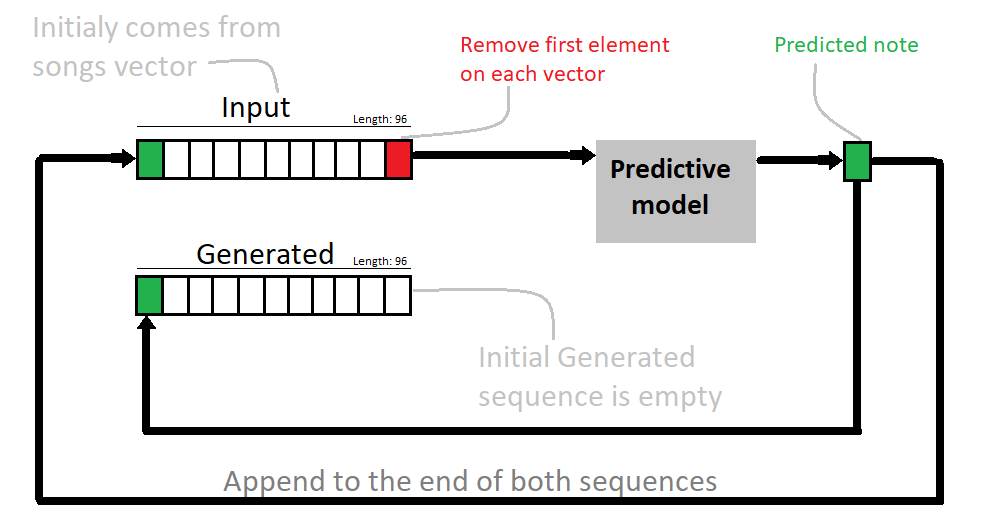

In [30]:
def prepare_sequences(notes, pitch_names, n_range):
    # map the notes into int figures
    note_to_int_map = [dict((note, number) for number, note in enumerate(pitch_names[i])) for i in range(4)]
    
    sequence_length = 96
    n_input = []
    filtered_input = []

    # Create input sequences and the respective outputs
    for i in range(0, len(notes) - sequence_length):
        sequence_in = notes[i:i + sequence_length]
        in_seq = []
        f_in_seq = []
        for char in sequence_in:
            seq = []
            f_seq = []
            for j in range(4):
                seq.append(note_to_int_map[j][char[j]])
                f_seq.append(seq[len(seq)-1]/float(n_range[j]))
            in_seq.append(seq)
            f_in_seq.append(f_seq)

        n_input.append(in_seq)
        filtered_input.append(f_in_seq)

    # Reshape the input into a format compatible with network layers
    n_input = numpy.reshape(n_input, (len(n_input), sequence_length, 4))
    filtered_input = numpy.reshape(filtered_input, (len(filtered_input), sequence_length, 4))

    return (n_input, filtered_input)

In [31]:
# Run prepare_sequences
n_input, normalized_input = prepare_sequences(notes, pitch_names, n_range)

## Create network
In order to generate a song from a trained model, we would first have to compile the model, and then load the weights we saved during training.<br>
We will use again the same code as in the Training step to compile the model, and then load the weights file of the previous step.

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Activation
def create_network(n_input, n_range):
    print(n_input.shape)
    model = Sequential()
    model.add(LSTM(
        256,
        input_shape=(n_input.shape[1], n_input.shape[2]),
        return_sequences=True
    ))

    model.add(Dropout(0.2))
    model.add(LSTM(32))
    model.add(Dropout(0.2))
    model.add(Dense(sum(n_range)))
    model.add(Activation('softmax'))
    model.compile(metrics=["accuracy"],loss='categorical_crossentropy', optimizer='rmsprop')
    
    
    model.load_weights(time_stamp + "/weights.hdf5")
    
    return model

In [33]:
# Run create_network
model = create_network(n_input, n_range)

(425, 96, 4)


## Generate notes
Now we can use the trained network to generate notes based on every set of sequence.
In order to do that, we have to create a mapping function that reverses the step taken in the notes preperation made in the 'Training' step.

In [34]:
def generate_notes(model, n_input, pitch_names, n_range):
    start = numpy.random.randint(0, len(n_input)-1)

    # Map the int symbols into thier original note-notation representation.
    int_to_note_map = dict((number, note) for number, note in enumerate(pitch_names))

    # Begin the generation from an arbitraty point in the network input sequence.
    pattern = n_input[start].tolist()
    prediction_output = []
    
    
    # We will generate 250 ticks, which roughly sums up to 2 minutes
    # song time. This number is arbitrary
    
    for note_index in range(250):
        # Reshape input into it's form considering the 4 instrument separation
        prediction_input = numpy.reshape(pattern, (1, len(pattern), 4))
        
        # Predict the next note
        prediction = model.predict(prediction_input, verbose=0)

        # This part is the reverse function of the one mentioned in the 'Preparing notes' section in the training step.
        # It transforms a matrix and according to the n_range array it unconcatinates (splits) 
        # The rows and turns them into the columns of the new matrix
        unconcatinate = []
        for i in range(len(prediction)): unconcatinate.append(spliter(prediction[i], n_range))
        unconcatinate = [[unconcatinate[j][i] for j in range(len(unconcatinate))] for i in range(len(unconcatinate[0]))]
        prediction = unconcatinate

        index = [numpy.argmax(prediction[i]) for i in range(4)]
        result = [int_to_note_map[i][index[i]] for i in range(4)]
        
        # Print every 20 ticks for output visibility
        if note_index% 20 == 0: print("note_index " + str(note_index) + " " + str(result))
        
        prediction_output.append(result)
        pattern.append(index)
        #trim the first element
        pattern = pattern[1:len(pattern)]

    return prediction_output

# A utility function that gets a data-array and a slices-array (such that sum(slices)=len(arr)),
# And returns an array scliced by the size of any element according to slices array.
def spliter(arr, slices):
    arrs = []
    for i in range(len(slices)):
        pice = arr[:slices[i]]
        arrs.append(pice)
        arr = arr[slices[i]:]
    return arrs

In [35]:
prediction_output = generate_notes(model, n_input, pitch_names, n_range)

note_index 0 ['41, 57, 65', '57, 60, 65', '29', '35, 42']
note_index 20 ['55, 60', '57, 60, 65', '29', '35, 42']
note_index 40 ['55, 60', '57, 60, 65', '29', '54']
note_index 60 ['55, 60', '57, 60, 65', '29', '54']
note_index 80 ['55, 60', '57, 60, 65', '29', '54']
note_index 100 ['41, 57, 65', '57, 60, 65', '29', '54']
note_index 120 ['46, 53, 62', '57, 60, 65', '29', '54']
note_index 140 ['55, 60', '57, 60, 65', '29', '35, 42']
note_index 160 ['55, 60', '57, 60, 65', '29', '35, 42']
note_index 180 ['55, 60', '57, 60, 65', '29', '54']
note_index 200 ['55, 60', '57, 60, 65', '29', '54']
note_index 220 ['55, 60', '57, 60, 65', '29', '35, 42']
note_index 240 ['55, 60', '57, 60, 65', '29', '54']


Let's look at a potential example output:<br>
note_index 120 ['46, 53, 62', '71', '62', '37, 54, 63']

This means means that at tick 120, we get the following vector 4:<br>
[<br>
<pre>'46, 53, 62',   This is a Guitar chord<br>
'71',           This is a Piano note<br>
'62',           This is a bass note<br>
'37, 54, 63'    This is a Drums chord<br></pre>
]

## Create MIDI

Once we have all the notes of the generated song, all we have to do now is to warp the notes with the MIDI standard format (the midi_warper function) and finially create the MIDI file.

In [36]:
def create_midi(prediction_output):
    # Attribute the MIDI file the typical note tick and velocity. 
    offset = 200
    velocity = 90

    guitar = []
    piano = []
    bass = []
    drums = []
    instruments = [guitar, piano, bass, drums]
    
    # Values for MIDI track initialization to determine instrument type
    pitches = [0, 2, 0, 9]

    # Creating MIDI events from out generated output
    for timestamp, ptrn in enumerate(prediction_output):
        for channel, note in enumerate(ptrn):
            note_on = '{}, {}, Note_on_c, {}, {}, {}'.format(channel + 1, timestamp * offset, pitches[channel], note, velocity)
            note_off = '{}, {}, Note_off_c, {}, {}, 0'.format(channel + 1, (timestamp + 1) * offset, pitches[channel], note)
            instruments[channel].append(note_on)
            instruments[channel].append(note_off)

    # Warping the the newly created MIDI events with the
    # necessary initializer MIDI events (Function defined in the cell below)
    # Inserts all the data into a csv format.
    instruments = midi_warper(instruments, len(prediction_output) * offset)

    # Finally converting the CSV file into a MIDI file 
    with open("brain_music.mid", "wb") as output_file:
        midi_writer = py_midicsv.FileWriter(output_file)
        md = py_midicsv.csv_to_midi(instruments)
        midi_writer.write(md)

In [37]:
# Function used in the previous cell to wrap up the metwork output

def midi_warper(ins, closetime):
    # MIDI events necessary for relevant track initialization
    # MIDI format is described in the proposal and the introduction 
    init = [
        [
            '1, 0, Start_track\n',
            '1, 0, Title_t, "Guitar"\n',
            '1, 0, Program_c, 0, 24\n',
            '1, 0, Control_c, 0, 101, 0\n',
            '1, 0, Control_c, 0, 100, 0\n',
            '1, 0, Control_c, 0, 6, 6\n',
        ], [
            '2, 0, Start_track\n',
            '2, 0, Title_t, "Piano"\n',
            '2, 0, Program_c, 2, 0\n',
            '2, 0, Control_c, 2, 101, 0\n',
            '2, 0, Control_c, 2, 100, 0\n',
            '2, 0, Control_c, 2, 6, 6\n',
        ], [
            '3, 0, Start_track\n',
            '3, 0, Title_t, "Bass"\n',
            '3, 0, Program_c, 0, 33\n',
            '3, 0, Control_c, 0, 101, 0\n',
            '3, 0, Control_c, 0, 100, 0\n',
            '3, 0, Control_c, 0, 6, 6\n'
        ], [
            '4, 0, Start_track\n',
            '4, 0, Title_t, "Drums"\n',
            '4, 0, Program_c, 9, 0\n',
            '4, 0, Control_c, 9, 101, 0\n',
            '4, 0, Control_c, 9, 100, 0\n',
            '4, 0, Control_c, 9, 6, 6\n',
        ]
    ]
    csv = ['0, 0, Header, 1, 4, 480\n']

    # Appending the notes's lines along with thier accompanied lines into a CSV file.
    # Channeling the notes back into the MIDI file preseves the association of each note with it's instrument.
    for channel in range(len(ins)):
        csv += [line for line in init[channel]]

        for x in ins[channel]:
            notes = x.split(', ')[4:-1]
            setup = x.split(', ')[0:4]
            velocity = x.split(', ')[-1:]
            for y in notes:
                midi_event = str(setup).replace("'", '').replace("[", '').replace("]", '') + ',' + y + ',' + velocity[0]
                csv.append(midi_event + '\n')

        csv.append('{}, {}, End_track\n'.format(channel + 1, closetime))

    csv.append('0, 0, End_of_file')

    return csv

In [38]:
# Run create_midi
create_midi(prediction_output)

# Results and analysis

We have now arrived at the last stage of the project!

We will now take a look at the results and analyse them.

We've trained a neural network model day and night for several weeks, with different model structures to see what kinds of result we get.</br>

Out of all our results, we have chosen 6 models to show.<br>
During training, we wanted to see how a certain network behaves at different stages, so the last 3 examples will have more between 2 and 3 midi files, produced by the **same** model but at different stages during training. We will refer to each such model as a network **instance**.<br>
For each instance we generated a midi file using the _generate_ function, and parsed it's data using the _state machine_ algorithm as mentioned at the data preparation stage.

For each model we want to look at the model structure, model training and the midi result it produced.
To help us with this task, we've built 3 functions for visualization.

**@draw_model** - produces a string that represents the model layers, for example: _[LSTM=512] ==> [Dropout=0.2] ==> [LSTM=128]_<br>
This means that the first layer is an LSTM cell with an output size of 512, which connects to a dropout layer with rate 0.2, which connects to another LSTM layer of output size 128 etc.

**@draw_acc_loss_graph** - produces a pretty straightworward graph that shows the loss value and how accurate the network is at "predicting" the next notes. Our loss and accuracy depend on the networks ability to generate the next note for **4** different instruments

**@print_notes** - generates 4 graphs for each instrument. Each graph shows the **index** of the note  / chord in the vocabulary over time / ticks.

So let's get started!
First one is the **draw_model** function, which reads the previously mentioned **nn_model.py** file and prints out a nice layout of the model structure

In [39]:
import pandas, os, glob, ast, numpy
from pylab import figure, show, ylabel

def draw_model(path):
    print("\n\nModel structure:\n\n")
    md = "./results/" + path + "/nn_model.py"
    model_txt = ""
    with open(md, 'r') as f:
        lines = f.readlines()
        seq = False
        
        # Filter neccessary lines and remove unnecessary words and symbols
        for ln in lines:
            if "Activation(" in ln:
                seq = False
            
            if seq and "input_shape" not in ln:
                if "model." in ln: model_txt += '\n'
                model_txt += ln\
                    .replace('\n', '')\
                    .replace(',', '')\
                    .replace(' ', '')\
                    .replace('model.add(', '')\
                    .replace('))', '')\
                    .replace('return_sequences=True', '')\
                    .replace('sum(n_vocab)', 'OUTPUT_SIZE') \
                    .replace('(', '=')

            if "Sequential()" in ln:
                seq = True
    
    # Set up final symbols and print out the model
    layers = model_txt.split('\n')
    new_layers = ""
    for i, l in enumerate(layers):
        if len(l) == 0: continue
        new_layers += f"[{l}]"
        if i < len(layers) - 1:
            new_layers += " ==> "
            
    print(new_layers)

<br><br>
Next is our training graph. For this we made the **draw_acc_loss_graph** function, which prints out the loss and accuracy of the model
<br><br><br>

In [40]:
def draw_acc_loss_graph(n):
    training_data = pandas.read_csv(f"./results/{n}/log.csv", sep=';')
    f = figure()
    ax1 = f.add_subplot(111)
    line1 = ax1.plot(training_data['loss'], "r", label="Loss")
    ylabel("Loss")

    ax2 = f.add_subplot(111, sharex=ax1, frameon=False)
    line2 = ax2.plot(training_data['acc'], "b-", label="Accuracy")
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ylabel("Accuracy")
    
    ax1.yaxis.label.set_color('blue')
    ax2.yaxis.label.set_color('red')

    tkw = dict(size=3, width=1.5)
    ax1.tick_params(axis='y', colors='blue', **tkw)
    ax2.tick_params(axis='y', colors='red', **tkw)

    show()

<br><br>
And last one is the **print_notes** function, which prints the generated midi file as 4 graphs, one for each instrument 
<br><br><br>

In [41]:
   
def print_notes(path):
    for i, file in enumerate(glob.glob("./results/" + path + "/*.txt")):
        instrument_notes = []
        print("\n\nMidi created with loss \"" + file.split('\\')[-1:][0].split('.')[0].replace('-', '.') + "\":\n\n")
        with open(file, 'r') as f:
            md = ast.literal_eval(f.read())

        for t in md.keys():
            parsed_tick = []
            tick = md[t]

            for inst in ["Guitar", "Piano", "Bass", "Drums"]:
                try:
                    filtered_list = [x for x in tick[inst]]
                    if inst is not "Drums": filtered_list = filtered_list[:3]
                    parsed_tick.append(str(sorted(set(filtered_list))).replace('[', '').replace(']', ''))
                except:
                    parsed_tick.append("")

            if all(len(x) > 0 for x in parsed_tick): instrument_notes.append(parsed_tick)

        pitch_names = [sorted(list(set([n[i] for n in instrument_notes]))) for i in range(4)]
        note_to_int_map = [dict((note, number) for number, note in enumerate(pitch_names[i])) for i in range(4)]

        n_input = []

        n_input.append([[note_to_int_map[j][char[j]] for j in range(4)] for char in instrument_notes])

        n_patterns = len(n_input[0])

        # reshape the input into a format compatible with LSTM layers
        n_input = numpy.reshape(n_input, (1, n_patterns, 4))

        q = n_input[0].tolist()
        q = [[q[j][i] for j in range(len(q))] for i in range(len(q[0]))]

        n_input = q
        color_pallete = ['r', 'g', 'b', 'y']
        for i, x in enumerate(["Guitar", "Piano", "Bass", "Drums"]):
            ax1 = figure().add_subplot(111)
            line1 = ax1.plot(n_input[i], color_pallete[i])
            ylabel(x)

            show()


Let's unify all these into a simgle function, and scan our result runs 


In [42]:
def visualize(path):
    draw_model(path)
    draw_acc_loss_graph(path)
    print_notes(path)

runs = os.listdir("./results/")
print(runs)

['run #1', 'run #2', 'run #3', 'run #4', 'run #5', 'run #6']


Great, Now let's see how it all adds up!


# Run #1



Model structure:


[LSTM=OUTPUT_SIZE]


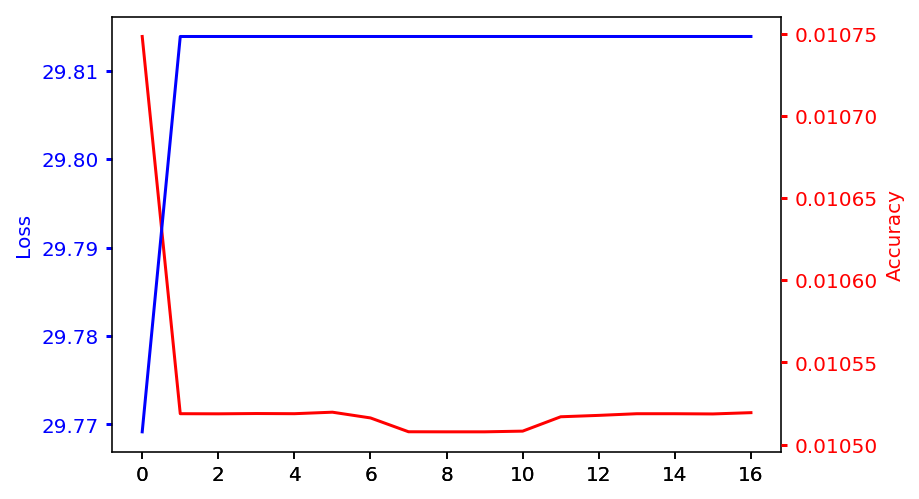



Midi created with loss "29.71":




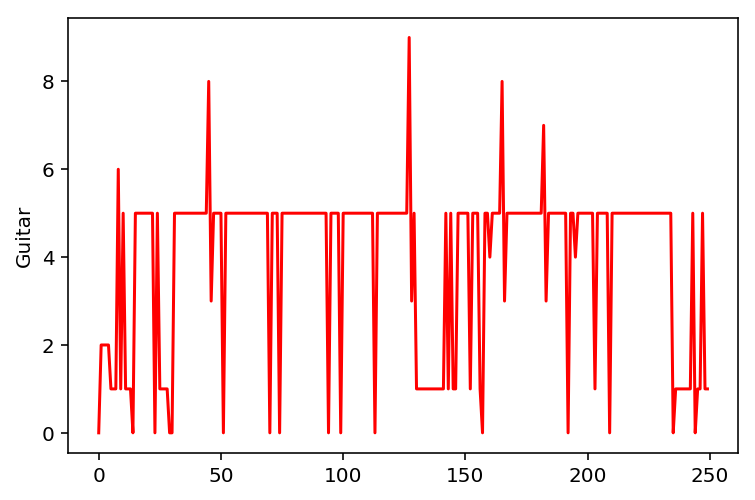

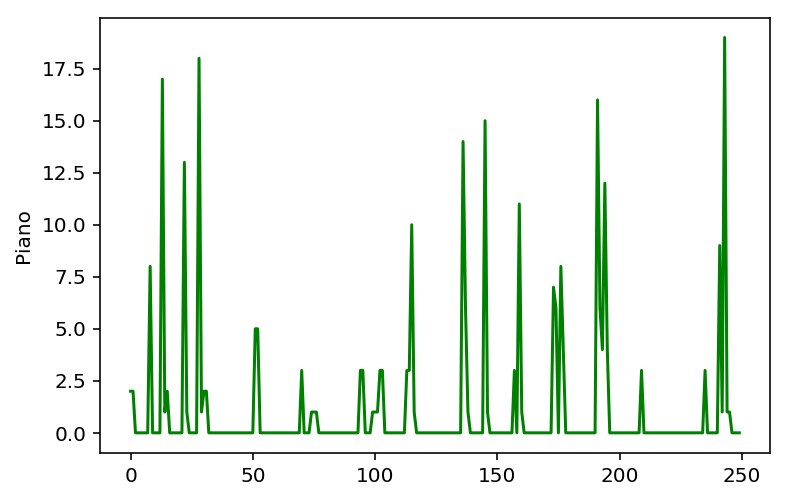

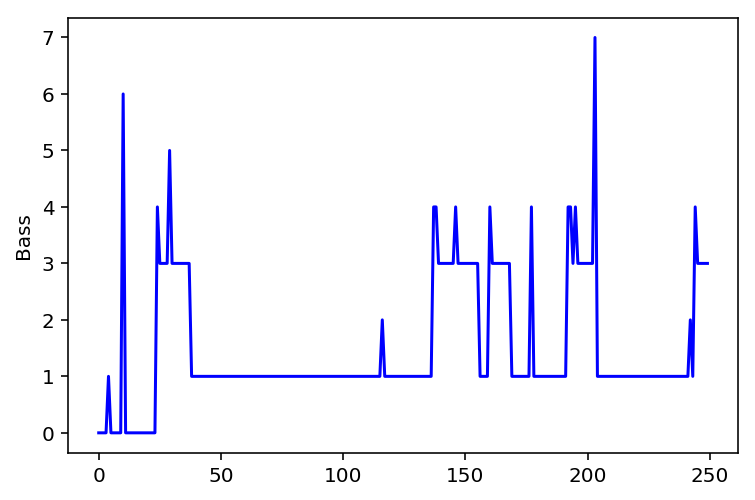

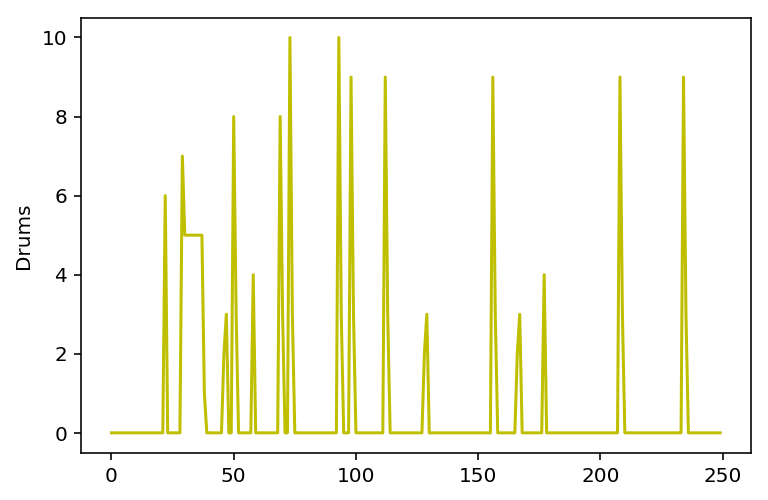

In [43]:
visualize('run #1')

### MODEL:
Our first model consists of only one LSTM layer with an output vector.<br>
We've trained it for 16 epochs and checked what the generated midi looks like.<br>

### MIDI
Looks like the network isn't really sure of what to do, because the output is pretty much the same throughout the entire track but with some rough notes here and there


Let's hear what it sounds like

In [44]:
IFrame('https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/643862973&color=%23ff5500&auto_play=false&hide_related=false&show_comments=true&show_user=true&show_reposts=false&show_teaser=true', width="100%", height="166", scrolling="no", frameborder="no", allow="autoplay")

Well it doesn't really sound like anything just yet..<br>
Let's look at run #2
<br><br><br>
# Run #2



Model structure:


[LSTM=100] ==> [LSTM=100] ==> [Dropout=0.2] ==> [LSTM=100] ==> [Dropout=0.1] ==> [Dense=OUTPUT_SIZE]


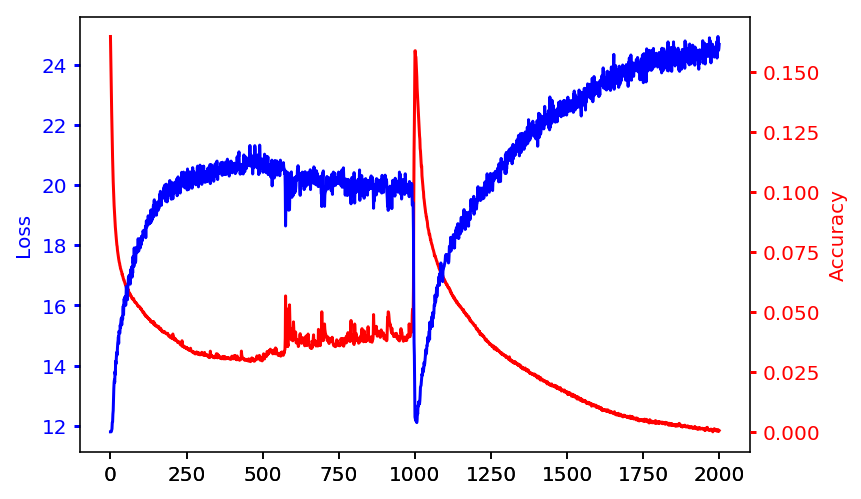



Midi created with loss "11.80":




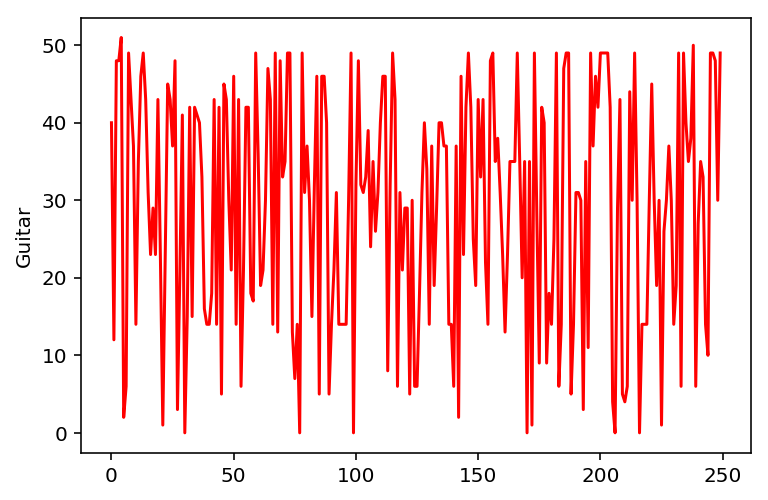

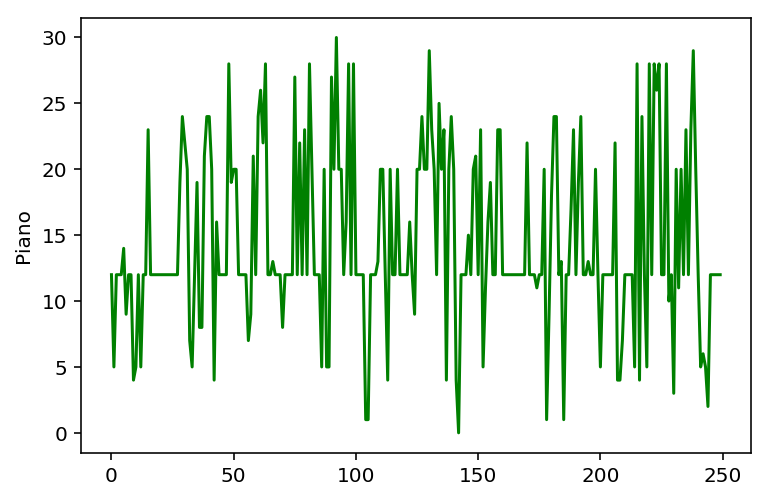

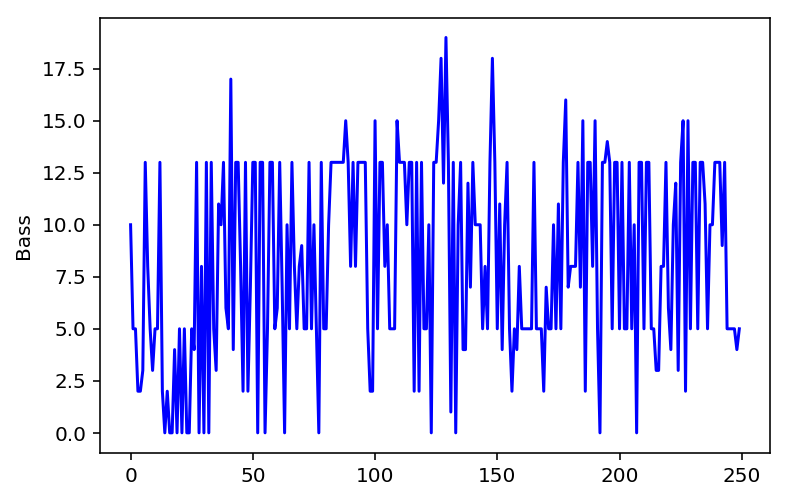

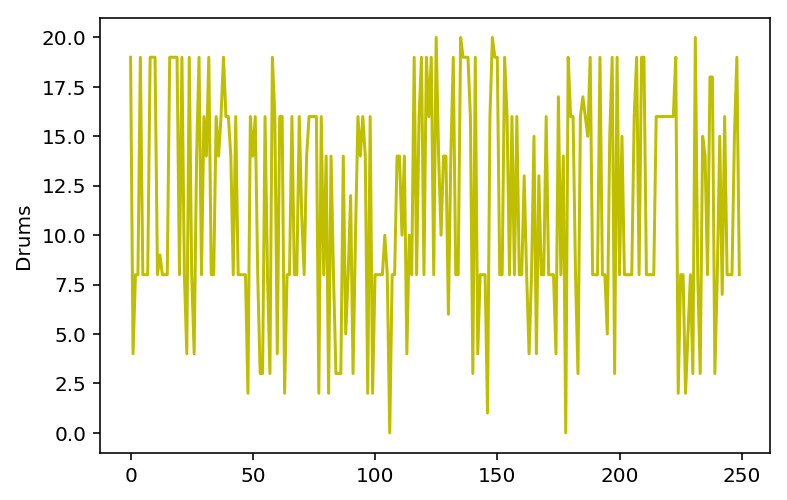

In [45]:
visualize('run #2')

### MODEL
Model #2 consists of only 3 LSTM layers with a droupout layer in between, and a dense layer. Each LSTM layer has an output of 100.<br>

### MIDI
We've trained this model for 2000 epochs and we can already see some diversion in the output notes in all instruments. Clearly adding more layers improves functionality.<br>
We can tell that the output isn't random because we see a lot of repetition in the indeces of the instruments. That means that the network "deliberately" chooses some notes over others.<br>
In other words, even though the network can generate any notes in it's vocabulary, it chooses to stick to certain areas more than others.

Let's hear it

In [46]:
IFrame('https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/643863051&color=%23ff5500&auto_play=false&hide_related=false&show_comments=true&show_user=true&show_reposts=false&show_teaser=true', width="100%", height="166", scrolling="no", frameborder="no", allow="autoplay")

Already sounds like something! The Piano role here is pretty dominant, and if you listen closely, you can hear some sort of "pattern", or an attempt of one at least.

# Run #3



Model structure:


[LSTM=512] ==> [Dropout=0.2] ==> [LSTM=128] ==> [Dropout=0.3] ==> [LSTM=256] ==> [Dropout=0.2] ==> [Dense=OUTPUT_SIZE]


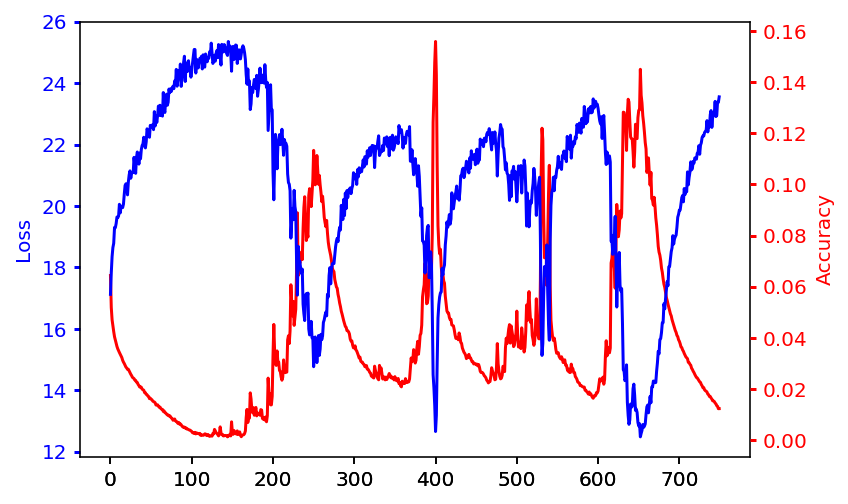



Midi created with loss "13.40":




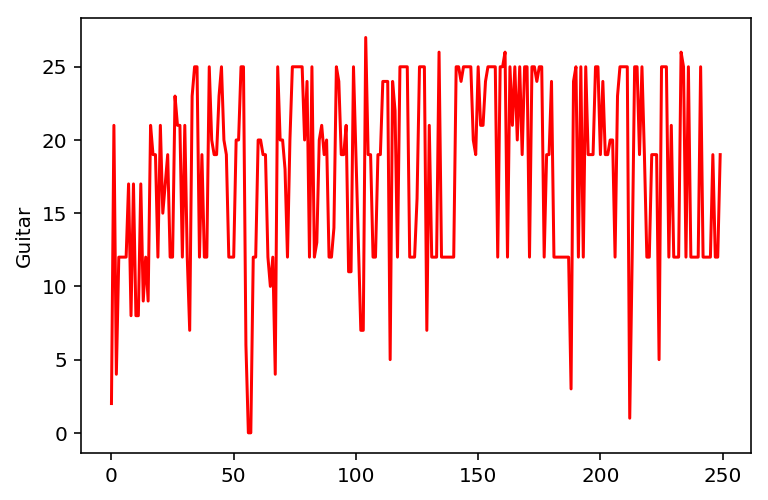

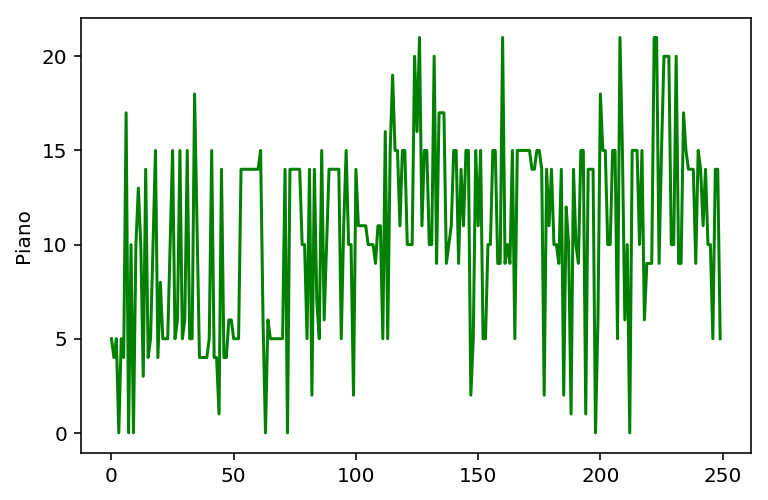

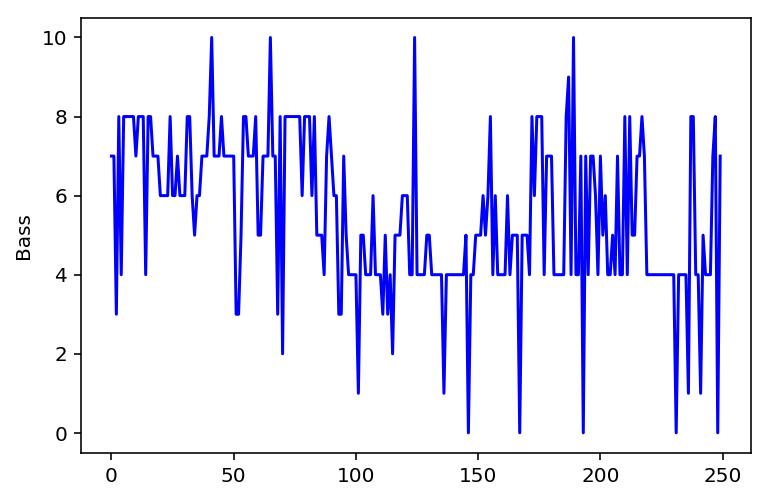

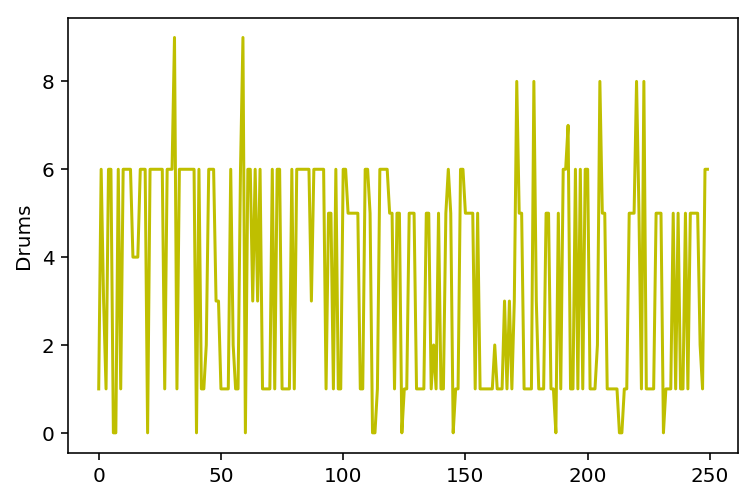

In [47]:
visualize('run #3')

In [48]:
IFrame('https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/643863006&color=%23ff5500&auto_play=false&hide_related=false&show_comments=true&show_user=true&show_reposts=false&show_teaser=true', width="100%", height="166", scrolling="no", frameborder="no", allow="autoplay")   

### MODEL
Model #3 consists of 3 "LSTM + droupout" layers, and a dense layer.<br>
The structure of this model is inspired by an auto-encoder structure. It has a high-dim layer (512) which connects to a compressed low-dim layer (128) and then opens up to a higher-dim layer (256). This was done to try and envoke a compress-decompress notion as done in image denoisers. We wanted to see if it plays a role in the area of music generation


### MIDI
Trained for 750 epochs, it looks like the loss function is resonating, and at loss 13.4 the midi it generated looks more alive. The avarage note index is more loose and changes it's range of action from time to time.

<br><br>
When working with neural networks, we would usually strive for the lowest possible loss rate.<br>
On our next run, we have 3 instances with loss values of: **7.46**, **8.38** and **9.89**
<br><br><br>

# Run #4



Model structure:


[LSTM=128] ==> [Dropout=0.3] ==> [LSTM=256] ==> [Dropout=0.2] ==> [LSTM=512] ==> [Dropout=0.1] ==> [Dense=OUTPUT_SIZE]


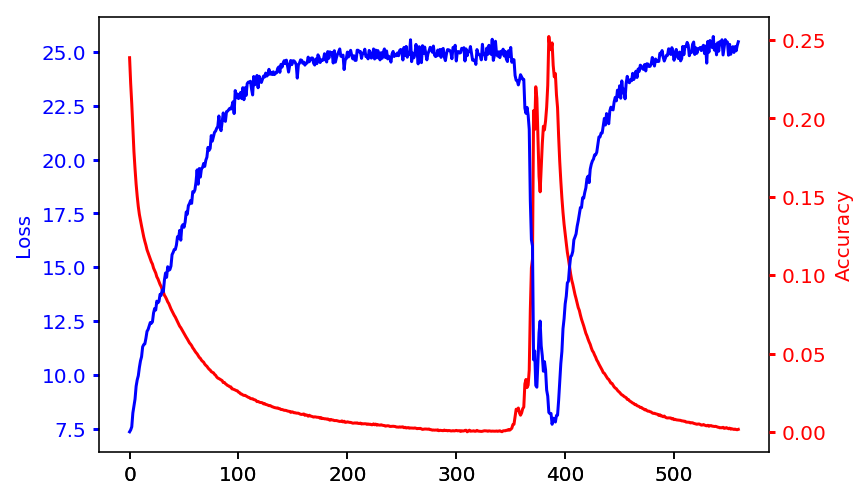



Midi created with loss "7.46":




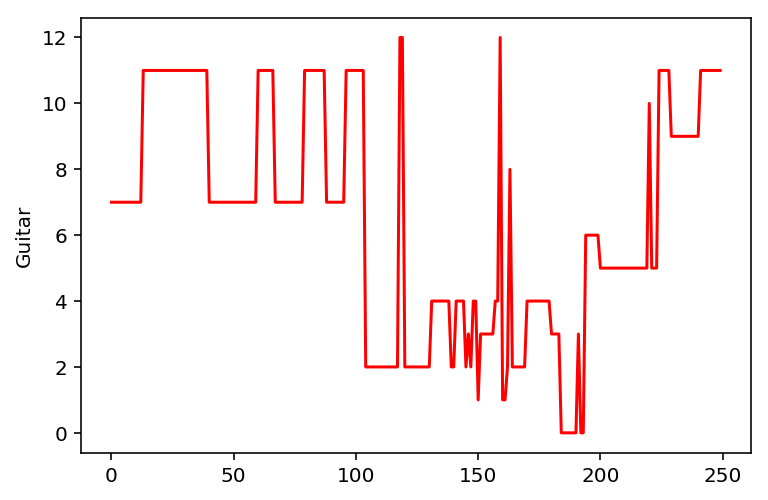

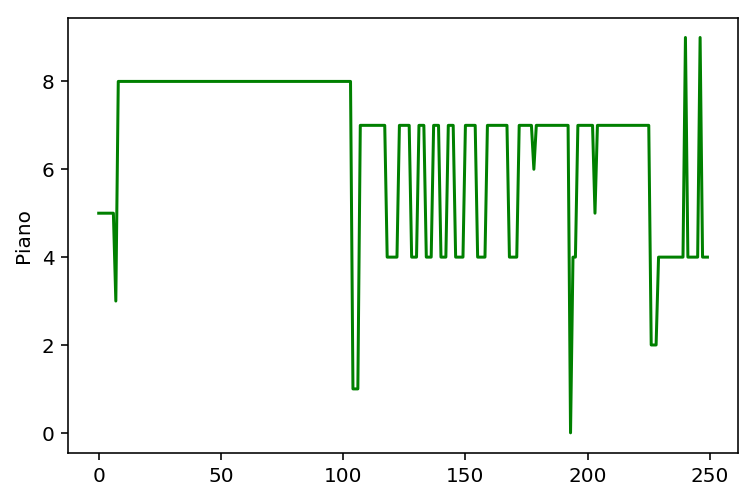

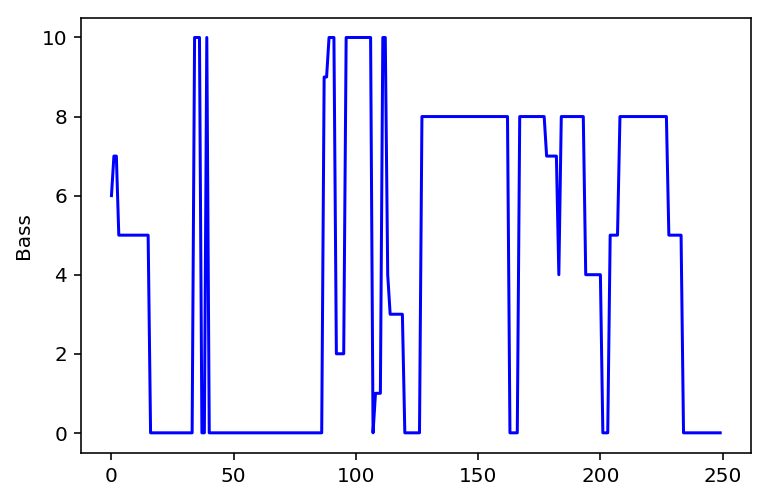

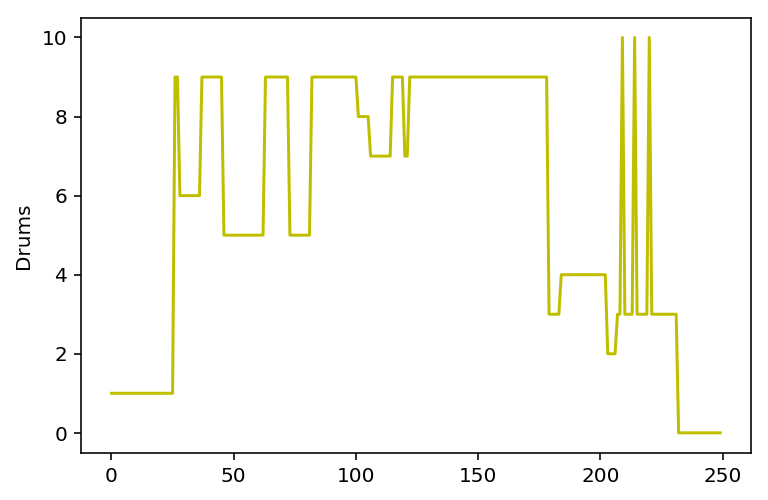



Midi created with loss "8.38":




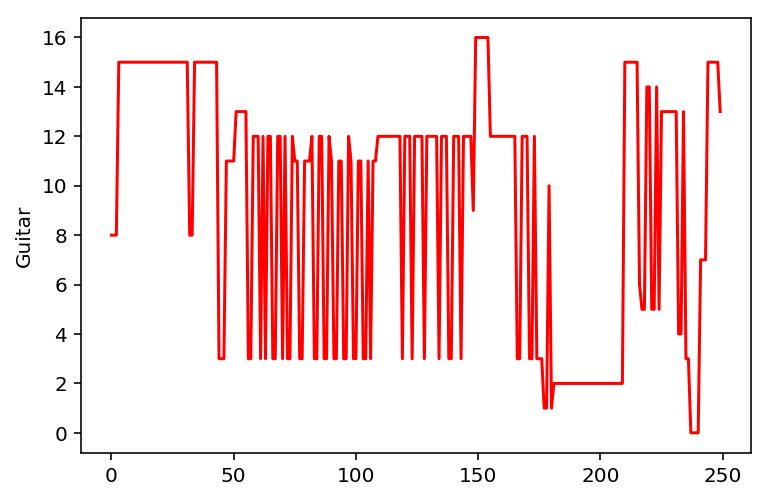

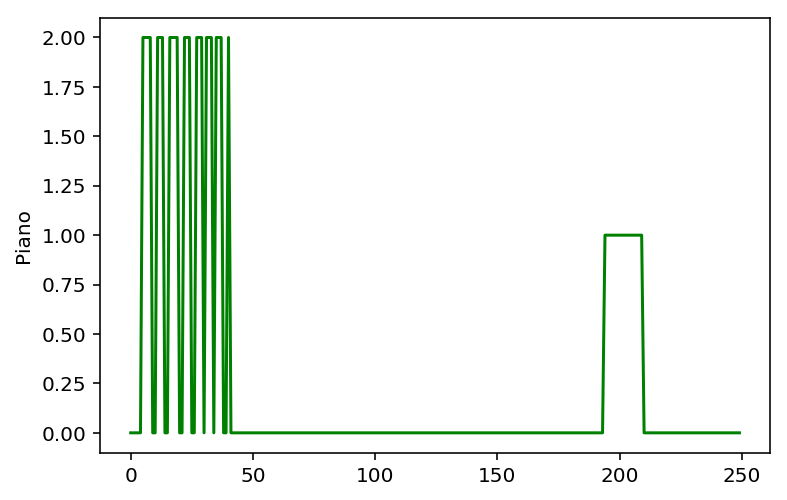

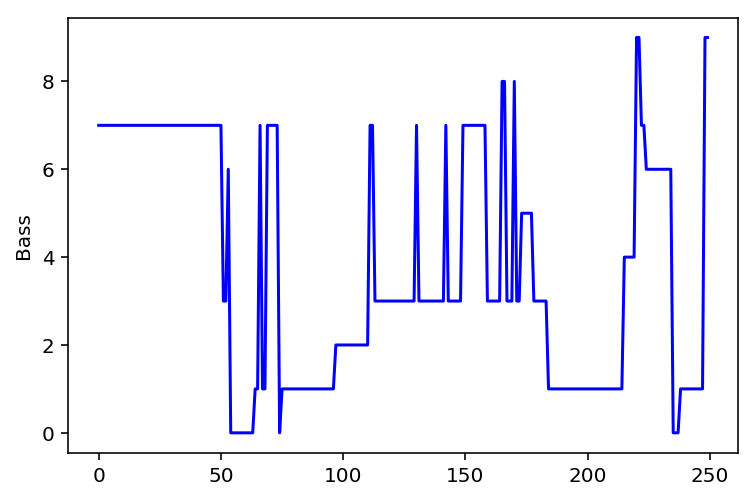

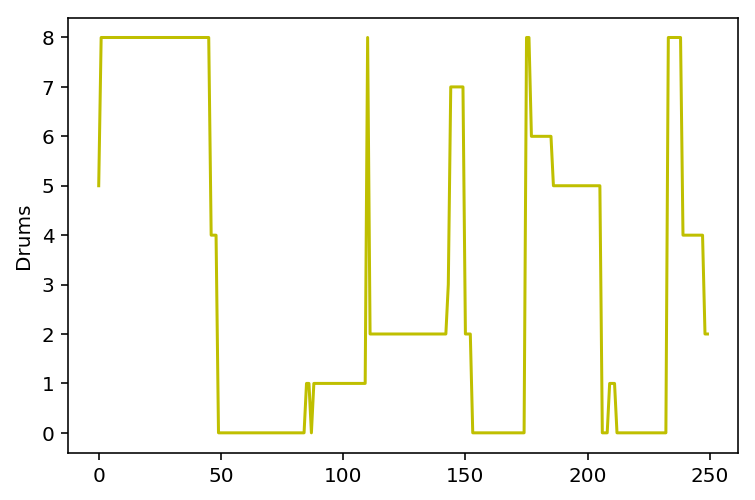



Midi created with loss "9.89":




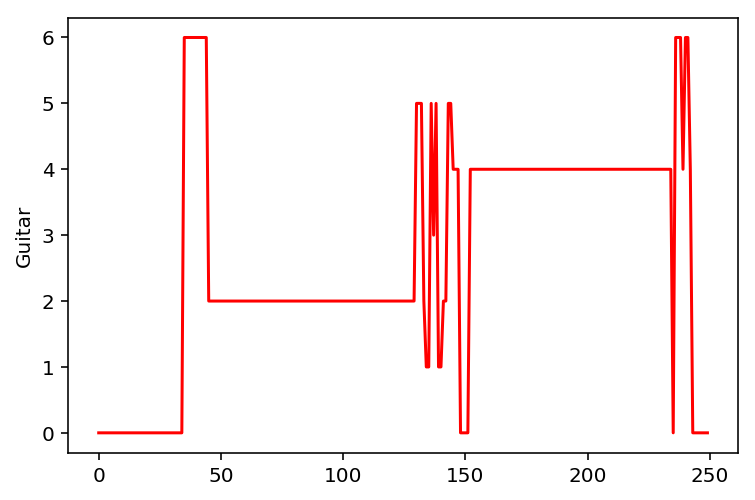

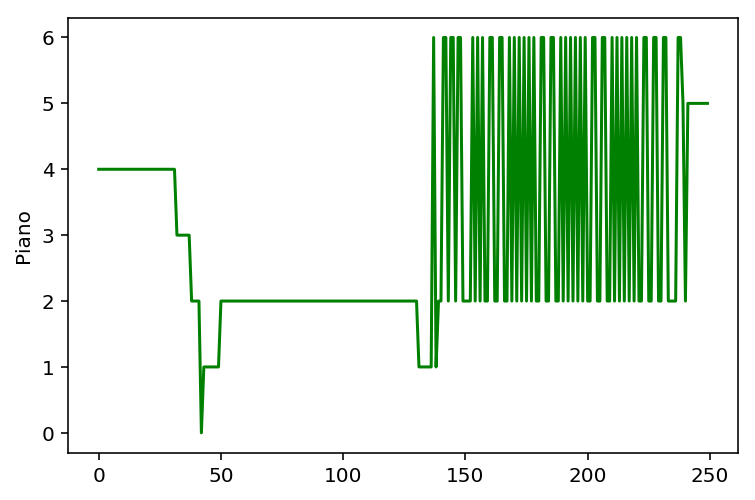

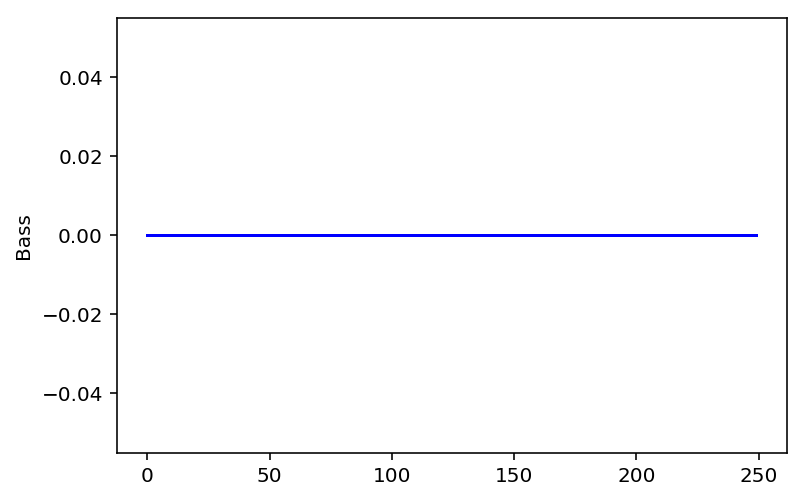

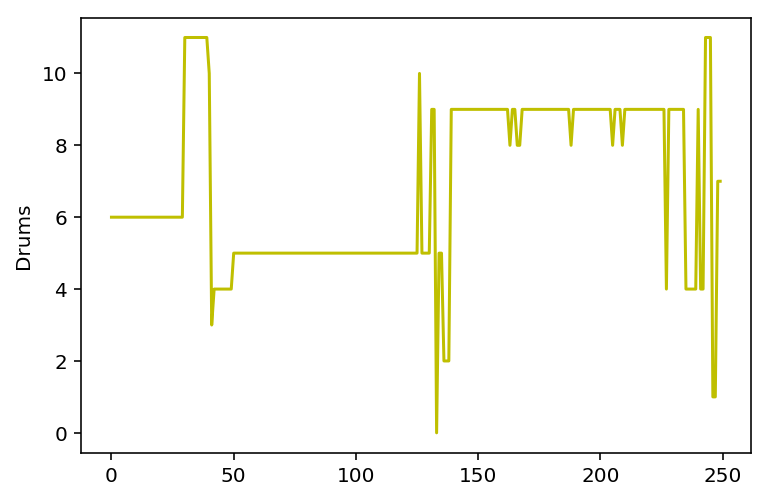

In [49]:
visualize('run #4')

### MODEL
The model structure here is a "divergent" one. First layer starts small, and gradually expands. This was an attempt to make the network build up with connection with higher dimentions at it's disposal at every step

### MIDI
Looking at the graphs we can see that the lower the loss value is, the less noisy and more stable the output is. But such a stable output isn't a good thing for us because what the neural network did was try and find the best "hook" point (the best weight values) for which the loss would be minimal, and once it found these points it didn't change.
<br><br><br>
Here are their respective midi tracks

In [50]:
IFrame('https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/643863111&color=%23ff5500&auto_play=false&hide_related=false&show_comments=true&show_user=true&show_reposts=false&show_teaser=true', width="100%", height="166", scrolling="no", frameborder="no", allow="autoplay")    

In [51]:
IFrame('https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/643863099&color=%23ff5500&auto_play=false&hide_related=false&show_comments=true&show_user=true&show_reposts=false&show_teaser=true', width="100%", height="166", scrolling="no", frameborder="no", allow="autoplay")    

In [52]:
IFrame('https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/643863084&color=%23ff5500&auto_play=false&hide_related=false&show_comments=true&show_user=true&show_reposts=false&show_teaser=true', width="100%", height="166", scrolling="no", frameborder="no", allow="autoplay")   

In the next run, we're going to hear some repetative patterns, so repetative that the graphs they produce are very "colorful".

# Run #5



Model structure:


[LSTM=700] ==> [Dropout=0.2] ==> [Dense=OUTPUT_SIZE]


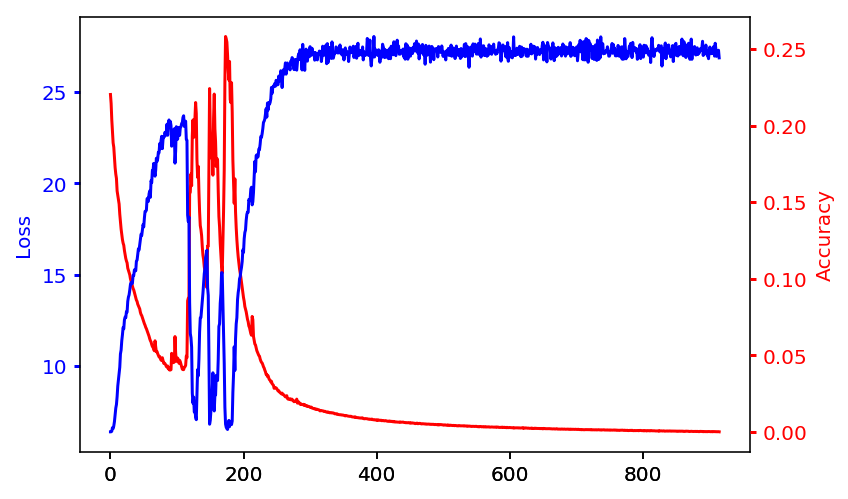



Midi created with loss "10.19":




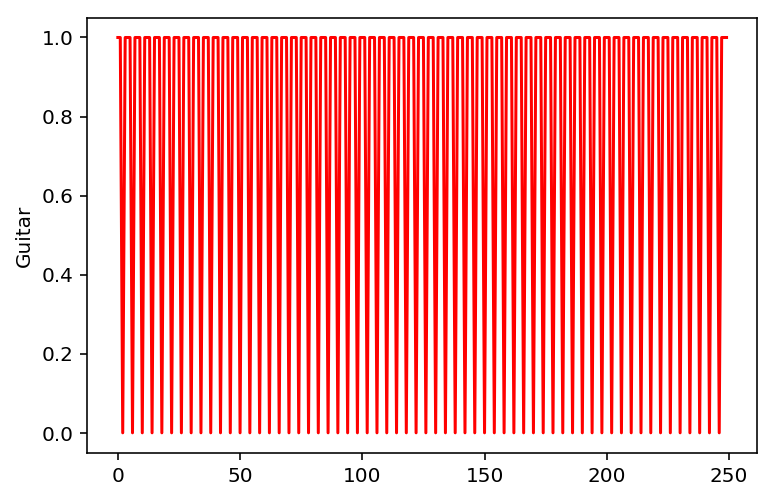

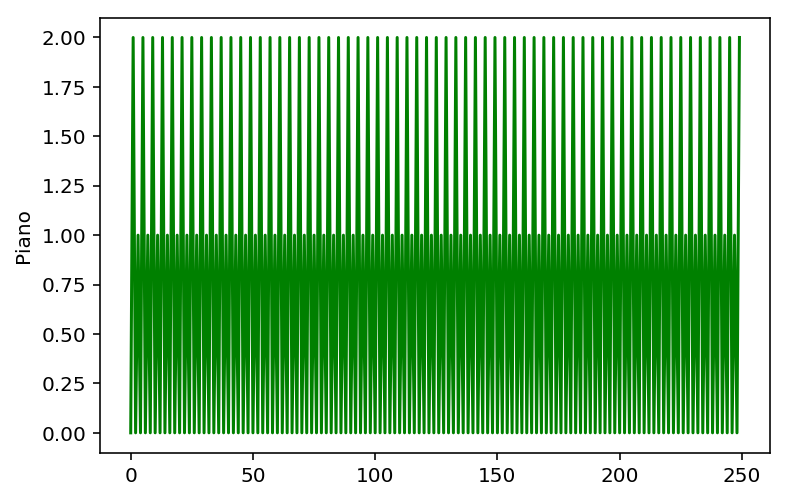

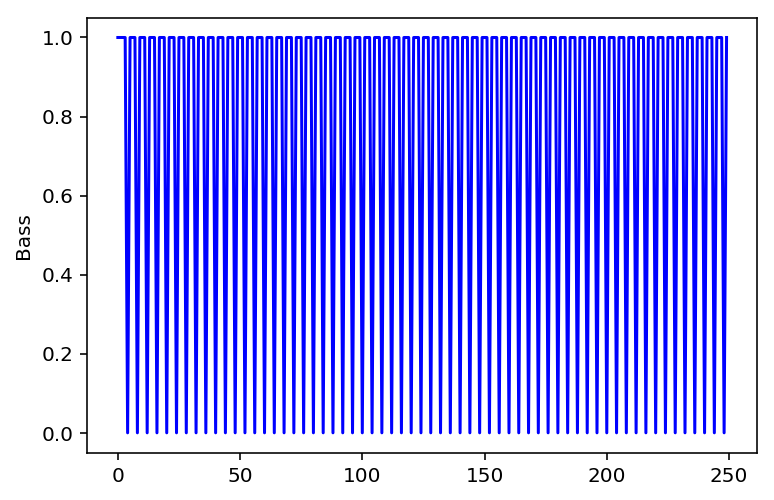

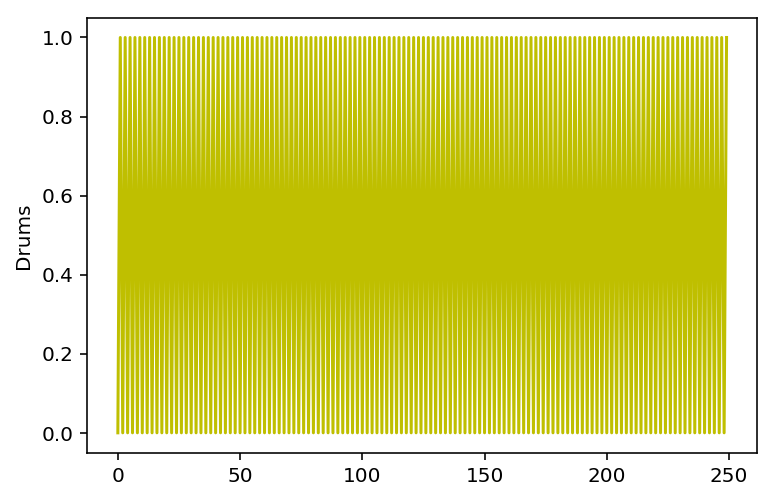



Midi created with loss "6.38":




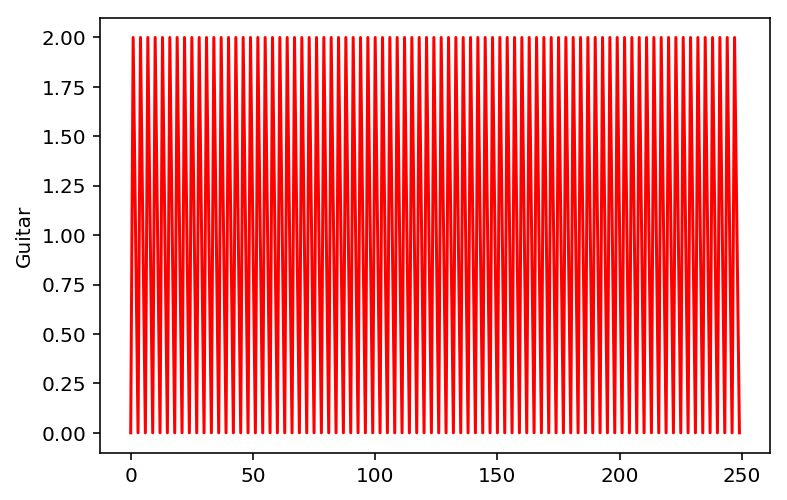

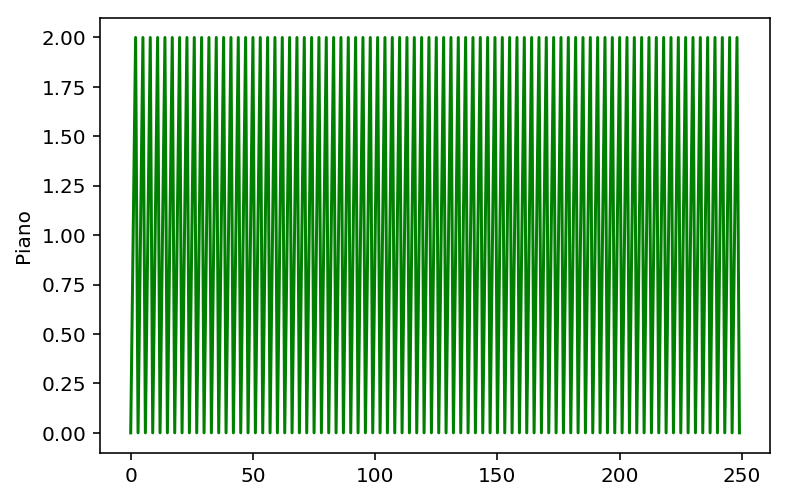

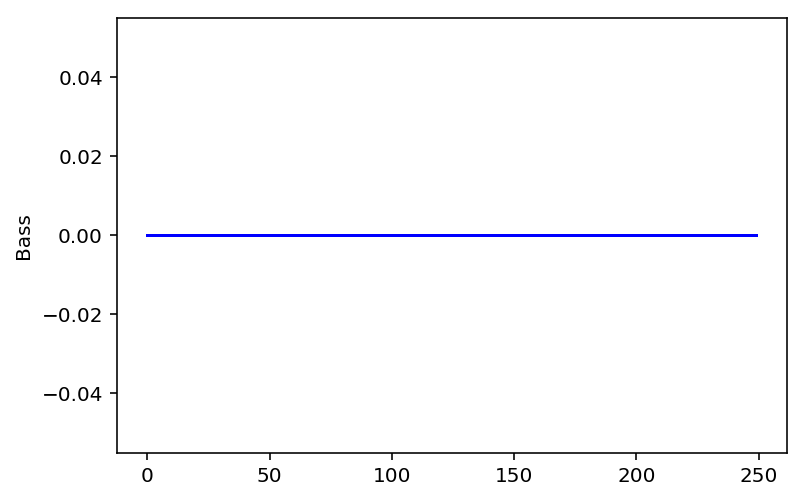

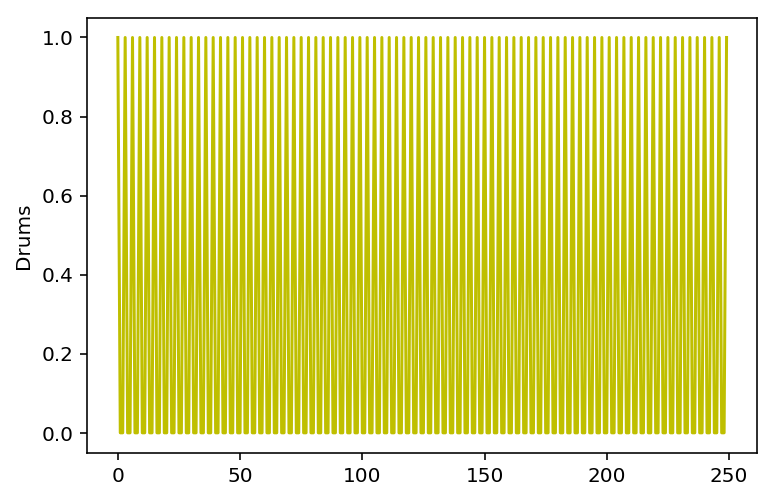



Midi created with loss "6.89":




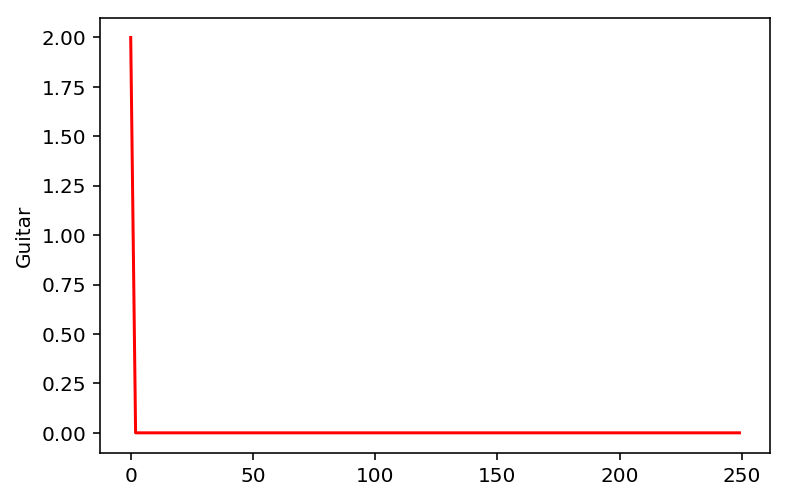

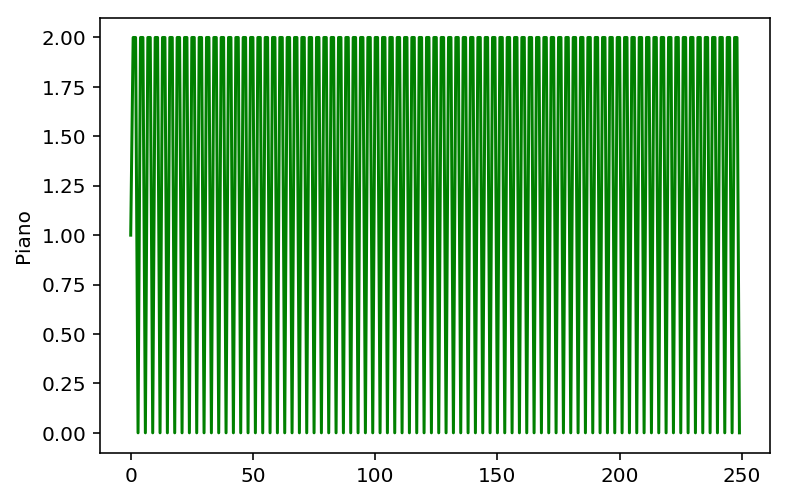

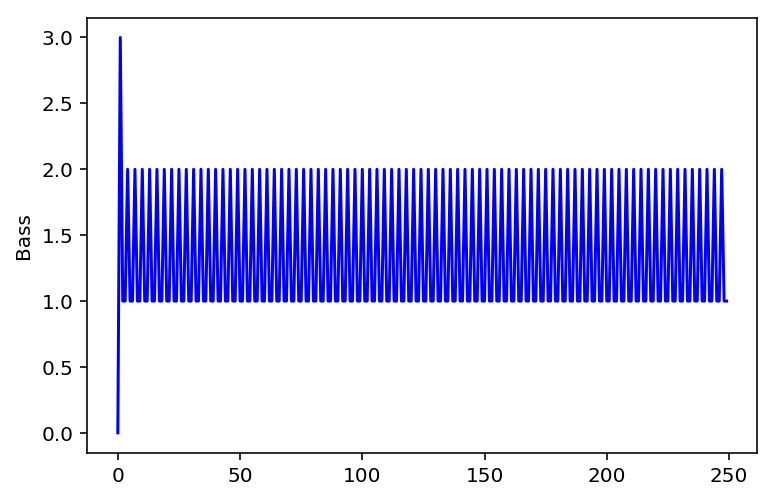

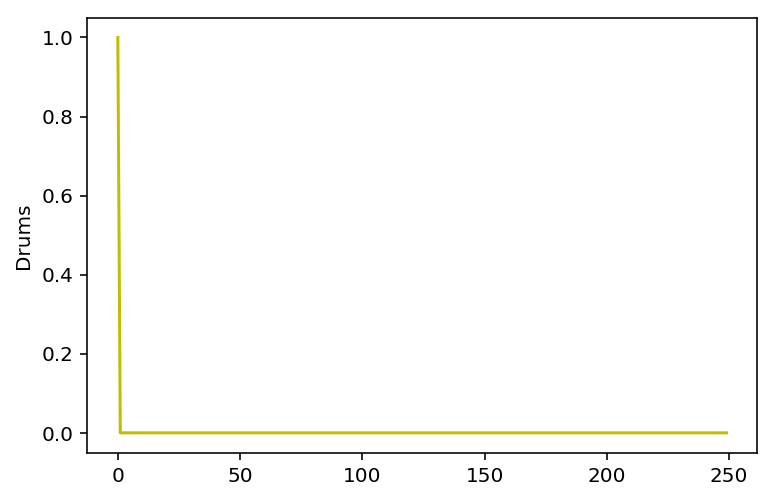

In [53]:
visualize('run #5')

In [54]:
IFrame('https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/643863069&color=%23ff5500&auto_play=false&hide_related=false&show_comments=true&show_user=true&show_reposts=false&show_teaser=true', width="100%", height="166", scrolling="no", frameborder="no", allow="autoplay")

In [55]:
IFrame('https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/643863138&color=%23ff5500&auto_play=false&hide_related=false&show_comments=true&show_user=true&show_reposts=false&show_teaser=true', width="100%", height="166", scrolling="no", frameborder="no", allow="autoplay")    

In [56]:
IFrame('https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/643863123&color=%23ff5500&auto_play=false&hide_related=false&show_comments=true&show_user=true&show_reposts=false&show_teaser=true', width="100%", height="166", scrolling="no", frameborder="no", allow="autoplay")    

### MODEL
Our model structure is very poor, it's a little similar to the first run, but with an extra dropout and dense layers. 

### MIDI
Seems like even for not-too-low loss rates, it's abilities are very limited. It did manage to come up with a pattern, trouble is that this pattern doesn't vary too much (or at all)


# Run #6



Model structure:


[LSTM=512] ==> [Dropout=0.2] ==> [LSTM=128] ==> [Dropout=0.3] ==> [LSTM=256] ==> [Dropout=0.2] ==> [Dense=OUTPUT_SIZE]


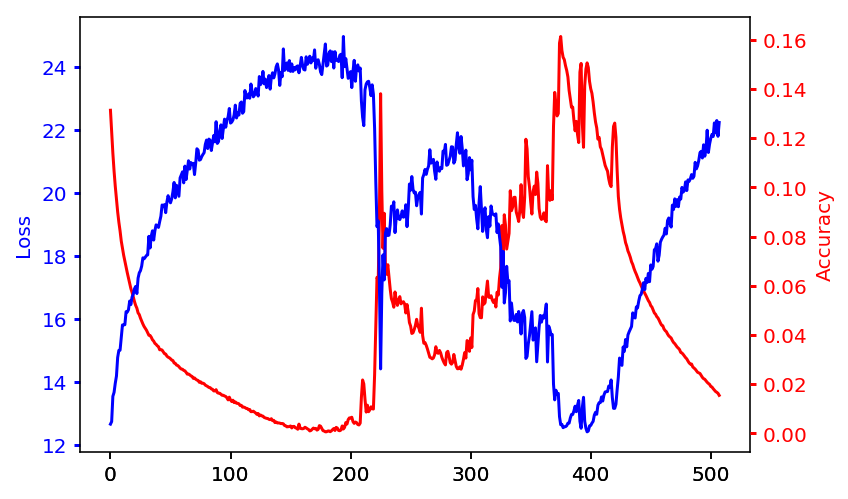



Midi created with loss "12.83":




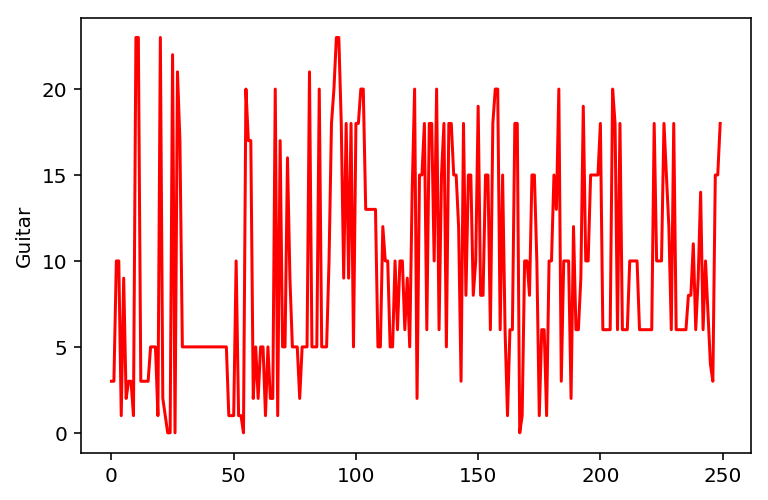

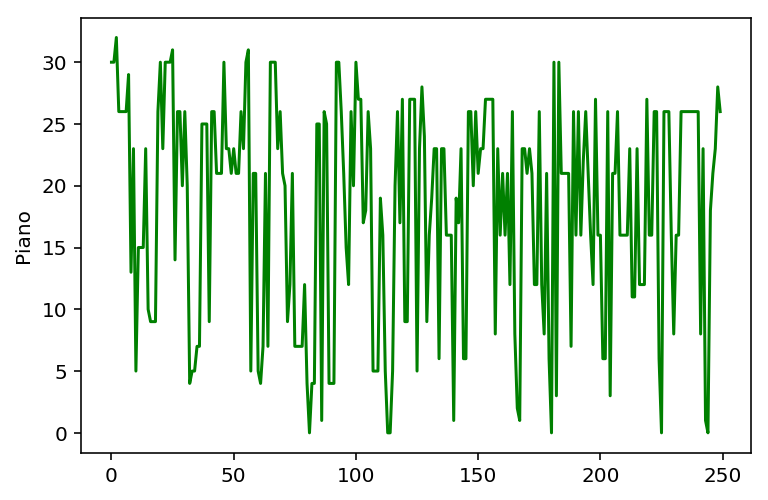

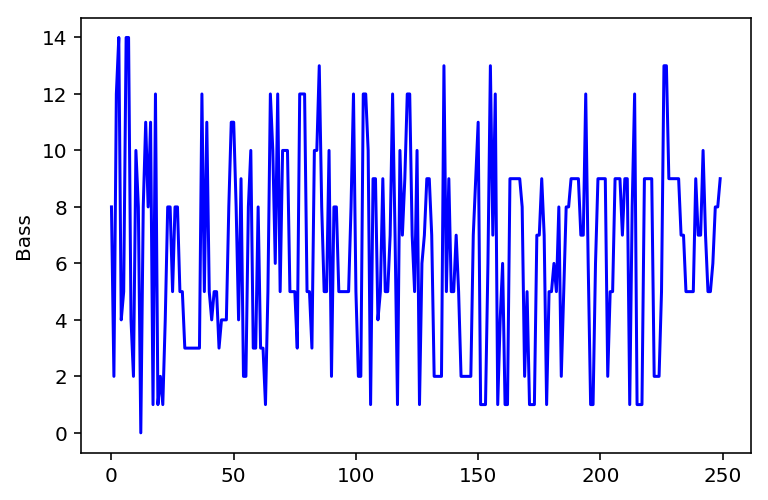

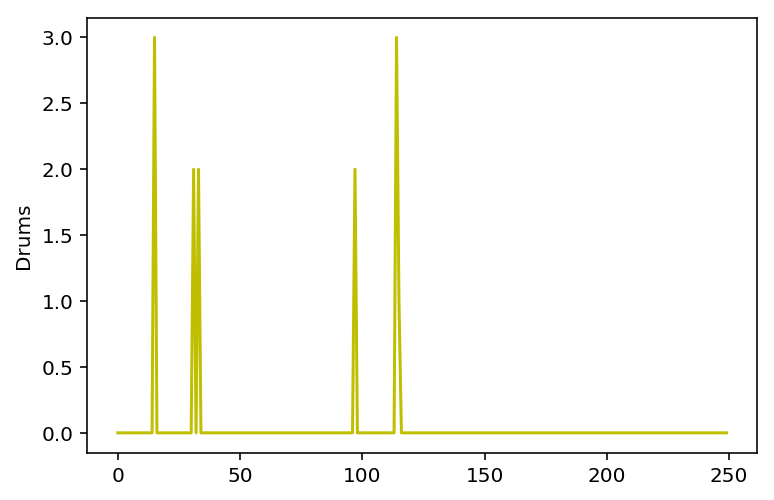



Midi created with loss "13.52":




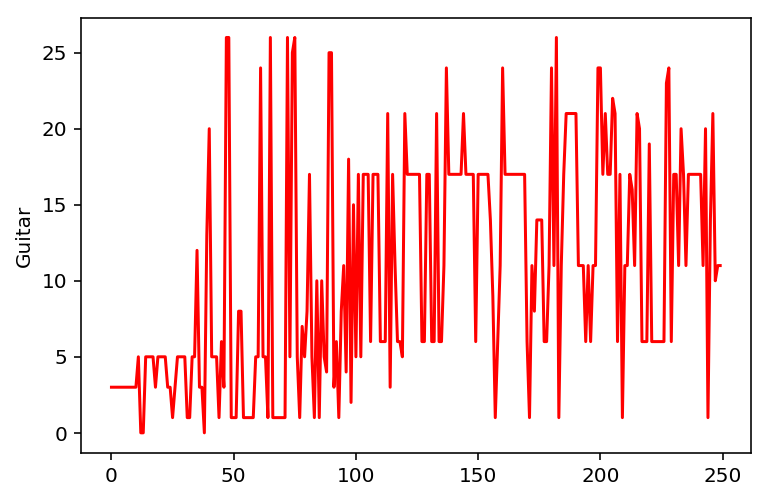

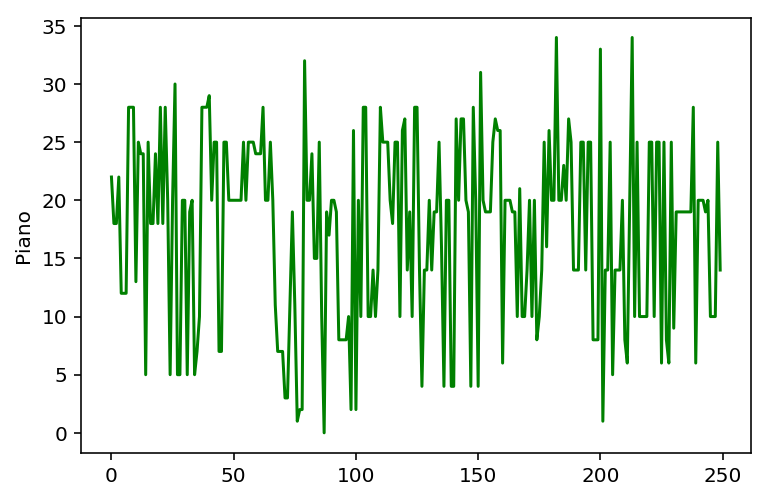

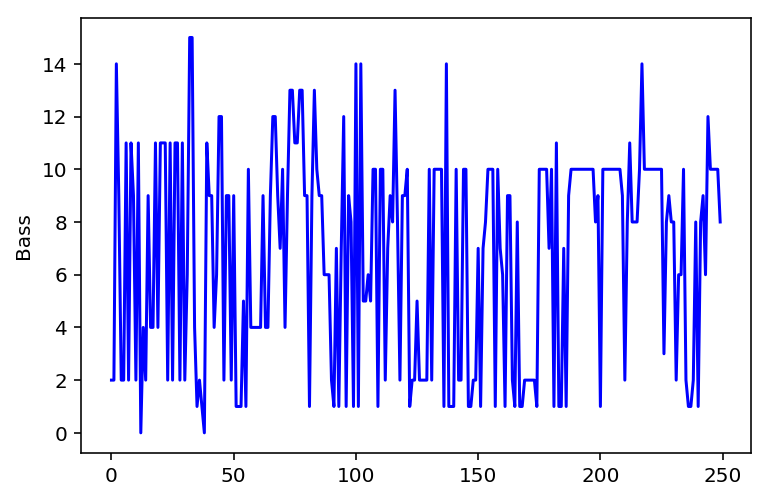

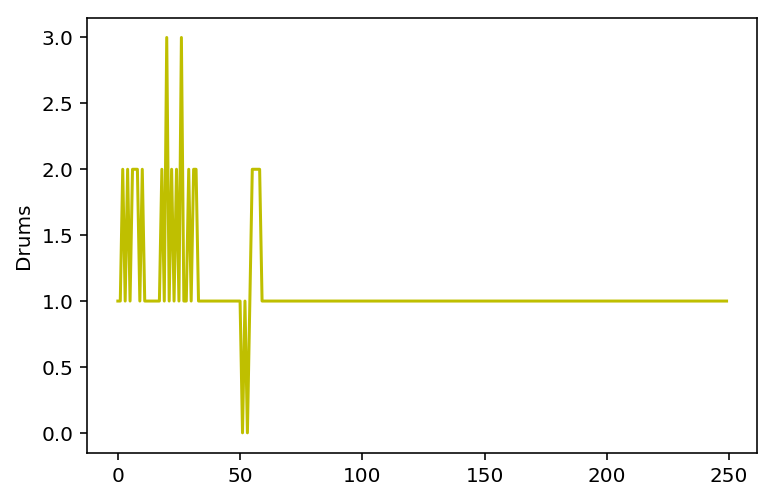

In [57]:
visualize('run #6')

In [58]:
IFrame('https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/643863030&color=%23ff5500&auto_play=false&hide_related=false&show_comments=true&show_user=true&show_reposts=false&show_teaser=true', width="100%", height="166", scrolling="no", frameborder="no", allow="autoplay") 

In [59]:
IFrame('https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/643862991&color=%23ff5500&auto_play=false&hide_related=false&show_comments=true&show_user=true&show_reposts=false&show_teaser=true', width="100%", height="166", scrolling="no", frameborder="no", allow="autoplay")

### MODEL
In this final run we used the same network as in run #3, to see if it could train differently given another chance.

### MIDI
If you listen closely, it sounds like there are some melodic attemps, especially where the drums parts are not a straight line, but other than that, not much has changed<br><br><br><br>

# Conclusions

* **Dataset**:<br>Finding a proper dataset turned out to be a very difficult task. First of all we had little to no knowdge about MIDI files and their structures. We tried to use several different music / midi librabier such as py_midicsv, music21 and python-midi to help us parse midi files with ease, but not all functions worked correctly and we don't know if the problem resided with the MIDI files or the libraries.<br><br>Eventually we combined functionalities from different libraries and our own code.<br>Once we got around to parsing MIDI files properly, we needed to find a way to isolate our 4 tracks from every MIDI files, so we came up with a plan to scan all track names, and find relevant keywords (such as "Guitr", "Piano" etc.).<br>We also found a huge repository with hundreds of MIDI songs from different genres, so we scanned them all, and even if we missed some good songs with relevant tracks because of naming issues, we still had enough examples to run with.<br><br>Lastly, generating a fully functional MIDI song at the end was also a difficult task, because there aren't enough explainations online on how to set up tracks to sound like instruments, so we had to reverse engineer a couple of songs to see how they worked. Eventually we hard - coded the header MIDI events for all tracks and it inserted them upon MIDI generation.<br><br>
    
* **Documentation**:<br>Musical libraries for python3 lack documentation, and MIDI's official documentation is very slim which made the whole task ever so difficult.<br><br>
    
* **Keras**:<br> We chose Keras as it is the go-to- library for neural networks by both amatuer and professionals. We used Tensorflow as a backend for Keras with the desire to train the neural net on the GPU for fast training, but setting it up to run on GPU was a **very** hard job, because it requires a lot of dependencies such as CUDA and a proper GPU model, so we trained the networks on the CPU which proved to be a very slow process<br><br>Also, during our work we came to the conclusion that our model wasn't optimal for this task, and we wanted to rebuild it to have 4 outputs, but the "Sequential()" model that Keras provides is only restricted to one output vector, so we had to come up with a workaround. we fused 4 outputs into 1 bit output, of size "n_range"<br><br>
    
* **Neural Network**:<br>The bigger the dataset is, and the more nodes / edges our computational graph has (Neural Network model), the more time it takes to train a network. Time complexity was at times so high we had to train the models for several days, just to find out that the output was total garbage and we had to come up with a newer model<br><br>

* **Music Generation**:<br>We attempted something that hasn't been done before, and that's generating a codependent 4 instrument song. We concluded that many more resources are required to execute such a task with good results and that our network was and planning were too simple for such a task.